In [1]:
import pybedtools as pbt
import pysam
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
import csv
from keras.models import load_model
from pkg_resources import resource_filename
from spliceai.utils import one_hot_encode
from maxentpy import maxent

Using TensorFlow backend.


In [2]:
import altair as alt
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
import os.path as op

In [4]:
import seaborn as sns

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import splanl.junction_scorer as jn
import splanl.merge_bcs as mbcs
import splanl.coords as cds
import splanl.plots as sp
import splanl.score_motifs as sm
import splanl.inspect_variants as iv
import splanl.post_processing as pp
import splanl.custom_splai_scores as css
import splanl.create_vcf as vcf

In [7]:
chr11 = '/nfs/kitzman3/lab_common/refs/human/ucsc_hg19/bychrom/chr11.fa'
chr11_seq = pp.get_refseq( chr11 )[ 0 ]

In [8]:
isos_in = '/nfs/kitzman2/smithcat/proj/wt1_2022/ex9_data/'

In [9]:
isos_df = pd.read_table( isos_in + 'wt1_ex9_isoforms_2022-0514.txt' )

In [10]:
isos_df = isos_df.set_index( 'isonum' )

In [11]:
bdout = isos_in

In [12]:
bam1 = ! ls /nfs/kitzman2/jacob/proj/jensplice/20220513_wt1_mpsa_trial4and3_deep_redoAligns/process_star/BB_test*/*out.wbcs.bam

In [13]:
bam2 = ! ls /nfs/kitzman2/jacob/proj/jensplice/20220422_wt1_mpsa_trial4and3_deep/process_star/BB_RT*/*out.wbcs.bam

In [14]:
bam = bam1 + bam2

In [15]:
msamp_fn = { b.split( '/')[ -1 ].split( '.' )[ 0 ].replace( 'Aligned', '' ) : b for b in bam }

In [16]:
isogrpdict = { samp: jn.create_iso_dict_no_cnst( isos_df.query( samp + '_filter!=0' ) )
              for samp in msamp_fn }

In [17]:
len( isogrpdict[ 'BB_test_Cos1053_JKLab0340_MM1B' ] )

68

In [18]:
satbls = ! ls /nfs/turbo/umms-kitzmanj/oldvol2/jacob/proj/jensplice/20220426_wt1_subasm_filter_stringent/sapipe/sa/*.haps.all.txt

In [19]:
satbl_fn = { sa.split( '/')[ -1 ].split( '.' )[ 0 ]: pd.read_table( sa ).set_index( 'readgroupid' ) for sa in satbls }

In [20]:
for lib in satbl_fn.keys():
    
    satbl_fn[ lib ] = satbl_fn[ lib ][ [ col for col in satbl_fn[ lib ] if not col.startswith( 'nbp_' ) ] ].copy()

In [21]:
msamp_rnabam = { samp: pysam.AlignmentFile(msamp_fn[samp],'rb') for samp in msamp_fn }

In [22]:
%%time
#52 min
msamp_bcrnatbl = { samp: jn.compute_isoform_counts_pe( msamp_rnabam[ samp ],
                                                               isogrpdict[ samp ],
                                                               [ ( 649, 696 ), ( 3478, 3533 ) ],
                                                               spl_tol = 3,
                                                               indel_tol = 20,
                                                               min_matches_for = 70,
                                                               min_matches_rev = 50,
                                                               count_otherisos = True,
                                                               bc_tag = 'BC' )
                  for samp in msamp_rnabam }

processed 1000 bcs, 31955 reads
processed 2000 bcs, 67678 reads
processed 3000 bcs, 104625 reads
processed 4000 bcs, 135250 reads
processed 5000 bcs, 175518 reads
processed 6000 bcs, 207177 reads
processed 7000 bcs, 238942 reads
processed 8000 bcs, 271519 reads
processed 9000 bcs, 303319 reads
processed 10000 bcs, 331774 reads
processed 11000 bcs, 365298 reads
processed 12000 bcs, 396164 reads
processed 13000 bcs, 430813 reads
processed 14000 bcs, 466631 reads
processed 15000 bcs, 504354 reads
processed 16000 bcs, 540229 reads
processed 17000 bcs, 571677 reads
processed 18000 bcs, 602486 reads
processed 19000 bcs, 632954 reads
processed 20000 bcs, 662173 reads
processed 21000 bcs, 694710 reads
processed 22000 bcs, 728389 reads
processed 23000 bcs, 764562 reads
processed 24000 bcs, 794577 reads
processed 25000 bcs, 823749 reads
processed 26000 bcs, 853002 reads
processed 27000 bcs, 883973 reads
processed 28000 bcs, 923132 reads
processed 29000 bcs, 952445 reads
processed 30000 bcs, 9810

processed 48000 bcs, 1998514 reads
processed 49000 bcs, 2034694 reads
processed 50000 bcs, 2072721 reads
processed 51000 bcs, 2109191 reads
processed 52000 bcs, 2146187 reads
processed 53000 bcs, 2183385 reads
processed 54000 bcs, 2219502 reads
processed 55000 bcs, 2256225 reads
processed 56000 bcs, 2301572 reads
processed 57000 bcs, 2344283 reads
processed 58000 bcs, 2391325 reads
processed 59000 bcs, 2430996 reads
processed 60000 bcs, 2466397 reads
processed 61000 bcs, 2504715 reads
processed 62000 bcs, 2546412 reads
processed 63000 bcs, 2587576 reads
processed 64000 bcs, 2628066 reads
processed 65000 bcs, 2672189 reads
processed 66000 bcs, 2708442 reads
processed 67000 bcs, 2751320 reads
processed 68000 bcs, 2802716 reads
processed 69000 bcs, 2844785 reads
processed 70000 bcs, 2879736 reads
processed 71000 bcs, 2922430 reads
processed 72000 bcs, 2962407 reads
processed 73000 bcs, 2997286 reads
processed 74000 bcs, 3032055 reads
processed 75000 bcs, 3066313 reads
processed 76000 bcs,

processed 277000 bcs, 11038658 reads
processed 278000 bcs, 11077469 reads
processed 279000 bcs, 11109824 reads
processed 280000 bcs, 11141284 reads
processed 281000 bcs, 11175945 reads
processed 282000 bcs, 11209571 reads
processed 283000 bcs, 11243228 reads
processed 284000 bcs, 11283058 reads
processed 285000 bcs, 11325149 reads
processed 286000 bcs, 11362534 reads
processed 287000 bcs, 11397296 reads
processed 288000 bcs, 11427519 reads
processed 289000 bcs, 11469962 reads
processed 290000 bcs, 11505601 reads
processed 291000 bcs, 11541272 reads
processed 292000 bcs, 11611655 reads
processed 293000 bcs, 11648007 reads
processed 294000 bcs, 11681141 reads
processed 295000 bcs, 11715628 reads
processed 296000 bcs, 11751062 reads
processed 297000 bcs, 11789538 reads
processed 298000 bcs, 11825277 reads
processed 299000 bcs, 11866859 reads
processed 300000 bcs, 11897612 reads
processed 301000 bcs, 11929794 reads
processed 302000 bcs, 11965974 reads
processed 303000 bcs, 11998178 reads
p

processed 4000 bcs, 157958 reads
processed 5000 bcs, 208340 reads
processed 6000 bcs, 241302 reads
processed 7000 bcs, 281265 reads
processed 8000 bcs, 319136 reads
processed 9000 bcs, 370242 reads
processed 10000 bcs, 410620 reads
processed 11000 bcs, 451785 reads
processed 12000 bcs, 494853 reads
processed 13000 bcs, 533429 reads
processed 14000 bcs, 572516 reads
processed 15000 bcs, 610894 reads
processed 16000 bcs, 644642 reads
processed 17000 bcs, 684113 reads
processed 18000 bcs, 721415 reads
processed 19000 bcs, 760106 reads
processed 20000 bcs, 793042 reads
processed 21000 bcs, 824260 reads
processed 22000 bcs, 856629 reads
processed 23000 bcs, 908326 reads
processed 24000 bcs, 942831 reads
processed 25000 bcs, 978276 reads
processed 26000 bcs, 1011561 reads
processed 27000 bcs, 1050808 reads
processed 28000 bcs, 1100019 reads
processed 29000 bcs, 1135592 reads
processed 30000 bcs, 1178636 reads
processed 31000 bcs, 1220662 reads
processed 32000 bcs, 1258624 reads
processed 330

processed 236000 bcs, 8771705 reads
processed 237000 bcs, 8815144 reads
processed 238000 bcs, 8846300 reads
processed 239000 bcs, 8878960 reads
processed 240000 bcs, 8912449 reads
processed 241000 bcs, 8945714 reads
processed 242000 bcs, 8984001 reads
processed 243000 bcs, 9015990 reads
processed 244000 bcs, 9052440 reads
processed 245000 bcs, 9122829 reads
processed 246000 bcs, 9157737 reads
processed 247000 bcs, 9189153 reads
processed 248000 bcs, 9219563 reads
processed 249000 bcs, 9257866 reads
processed 250000 bcs, 9289470 reads
processed 251000 bcs, 9323891 reads
processed 252000 bcs, 9377115 reads
processed 253000 bcs, 9416331 reads
processed 254000 bcs, 9452280 reads
processed 255000 bcs, 9497455 reads
processed 256000 bcs, 9530488 reads
processed 257000 bcs, 9565223 reads
processed 258000 bcs, 9595371 reads
processed 259000 bcs, 9636719 reads
processed 260000 bcs, 9666825 reads
processed 261000 bcs, 9701209 reads
processed 262000 bcs, 9743212 reads
processed 263000 bcs, 977933

processed 33000 bcs, 541753 reads
processed 34000 bcs, 557596 reads
processed 35000 bcs, 573469 reads
processed 36000 bcs, 587866 reads
processed 37000 bcs, 603821 reads
processed 38000 bcs, 619576 reads
processed 39000 bcs, 636435 reads
processed 40000 bcs, 651170 reads
processed 41000 bcs, 666701 reads
processed 42000 bcs, 682689 reads
processed 43000 bcs, 697319 reads
processed 44000 bcs, 713141 reads
processed 45000 bcs, 730953 reads
processed 46000 bcs, 748073 reads
processed 47000 bcs, 764761 reads
processed 48000 bcs, 780372 reads
processed 49000 bcs, 796247 reads
processed 50000 bcs, 812525 reads
processed 51000 bcs, 827849 reads
processed 52000 bcs, 843197 reads
processed 53000 bcs, 859724 reads
processed 54000 bcs, 875899 reads
processed 55000 bcs, 889865 reads
processed 56000 bcs, 907126 reads
processed 57000 bcs, 921587 reads
processed 58000 bcs, 937087 reads
processed 59000 bcs, 953089 reads
processed 60000 bcs, 968424 reads
processed 61000 bcs, 983540 reads
processed 6200

processed 45000 bcs, 400482 reads
processed 46000 bcs, 409758 reads
processed 47000 bcs, 419830 reads
processed 48000 bcs, 428837 reads
processed 49000 bcs, 439054 reads
processed 50000 bcs, 449819 reads
processed 51000 bcs, 459116 reads
processed 52000 bcs, 468936 reads
processed 53000 bcs, 479354 reads
processed 54000 bcs, 490126 reads
processed 55000 bcs, 500929 reads
processed 56000 bcs, 512299 reads
processed 57000 bcs, 522701 reads
processed 58000 bcs, 533395 reads
processed 59000 bcs, 543527 reads
processed 60000 bcs, 553597 reads
processed 61000 bcs, 563178 reads
processed 62000 bcs, 572871 reads
processed 63000 bcs, 582884 reads
processed 64000 bcs, 592608 reads
processed 65000 bcs, 602272 reads
processed 66000 bcs, 611663 reads
processed 67000 bcs, 621176 reads
processed 68000 bcs, 631657 reads
processed 69000 bcs, 641124 reads
processed 70000 bcs, 650193 reads
processed 71000 bcs, 660104 reads
processed 72000 bcs, 668913 reads
processed 73000 bcs, 678938 reads
processed 7400

processed 276000 bcs, 2431918 reads
processed 277000 bcs, 2441622 reads
processed 278000 bcs, 2451345 reads
processed 279000 bcs, 2461907 reads
processed 280000 bcs, 2472230 reads
processed 281000 bcs, 2482457 reads
processed 282000 bcs, 2491349 reads
processed 283000 bcs, 2501157 reads
processed 284000 bcs, 2510775 reads
processed 285000 bcs, 2520712 reads
processed 286000 bcs, 2530688 reads
processed 287000 bcs, 2539967 reads
processed 288000 bcs, 2550040 reads
processed 289000 bcs, 2560056 reads
processed 290000 bcs, 2570450 reads
processed 291000 bcs, 2580619 reads
processed 292000 bcs, 2588983 reads
processed 293000 bcs, 2597785 reads
processed 294000 bcs, 2607175 reads
processed 295000 bcs, 2616792 reads
processed 296000 bcs, 2625931 reads
processed 297000 bcs, 2634929 reads
processed 298000 bcs, 2643941 reads
processed 299000 bcs, 2652631 reads
processed 300000 bcs, 2661918 reads
processed 301000 bcs, 2670894 reads
processed 302000 bcs, 2679637 reads
processed 303000 bcs, 268945

processed 505000 bcs, 4564656 reads
processed 506000 bcs, 4571961 reads
processed 507000 bcs, 4580268 reads
processed 508000 bcs, 4588255 reads
processed 509000 bcs, 4595652 reads
processed 510000 bcs, 4603232 reads
processed 511000 bcs, 4611958 reads
processed 512000 bcs, 4620439 reads
processed 513000 bcs, 4630061 reads
processed 514000 bcs, 4639335 reads
processed 515000 bcs, 4649138 reads
processed 516000 bcs, 4657948 reads
processed 517000 bcs, 4665758 reads
processed 518000 bcs, 4674702 reads
processed 519000 bcs, 4682952 reads
processed 520000 bcs, 4690280 reads
processed 521000 bcs, 4699125 reads
processed 522000 bcs, 4707083 reads
processed 523000 bcs, 4715018 reads
processed 524000 bcs, 4723839 reads
processed 525000 bcs, 4732111 reads
processed 526000 bcs, 4740816 reads
processed 527000 bcs, 4749147 reads
processed 528000 bcs, 4756408 reads
processed 529000 bcs, 4763402 reads
processed 530000 bcs, 4770905 reads
processed 531000 bcs, 4778162 reads
processed 532000 bcs, 478520

processed 733000 bcs, 6503084 reads
processed 734000 bcs, 6510814 reads
processed 735000 bcs, 6518115 reads
processed 736000 bcs, 6526353 reads
processed 737000 bcs, 6534082 reads
processed 738000 bcs, 6541244 reads
processed 739000 bcs, 6548609 reads
processed 740000 bcs, 6555685 reads
processed 741000 bcs, 6563629 reads
processed 742000 bcs, 6571737 reads
processed 743000 bcs, 6579504 reads
processed 744000 bcs, 6586841 reads
processed 745000 bcs, 6593518 reads
processed 746000 bcs, 6601124 reads
processed 747000 bcs, 6607281 reads
processed 1000 bcs, 11251 reads
processed 2000 bcs, 21670 reads
processed 3000 bcs, 32408 reads
processed 4000 bcs, 44164 reads
processed 5000 bcs, 55527 reads
processed 6000 bcs, 65727 reads
processed 7000 bcs, 78182 reads
processed 8000 bcs, 89884 reads
processed 9000 bcs, 100466 reads
processed 10000 bcs, 111457 reads
processed 11000 bcs, 123197 reads
processed 12000 bcs, 134159 reads
processed 13000 bcs, 145191 reads
processed 14000 bcs, 156621 reads
p

processed 129000 bcs, 572134 reads
processed 130000 bcs, 575661 reads
processed 131000 bcs, 579310 reads
processed 132000 bcs, 583629 reads
processed 133000 bcs, 587455 reads
processed 134000 bcs, 591221 reads
processed 135000 bcs, 595089 reads
processed 136000 bcs, 599459 reads
processed 137000 bcs, 604189 reads
processed 138000 bcs, 608218 reads
processed 139000 bcs, 612054 reads
processed 140000 bcs, 616215 reads
processed 141000 bcs, 620943 reads
processed 142000 bcs, 625403 reads
processed 143000 bcs, 629702 reads
processed 144000 bcs, 634399 reads
processed 145000 bcs, 639522 reads
processed 146000 bcs, 644498 reads
processed 147000 bcs, 649264 reads
processed 148000 bcs, 654520 reads
processed 149000 bcs, 659119 reads
processed 150000 bcs, 663194 reads
processed 151000 bcs, 667270 reads
processed 152000 bcs, 671347 reads
processed 153000 bcs, 676133 reads
processed 154000 bcs, 680532 reads
processed 155000 bcs, 684713 reads
processed 156000 bcs, 688931 reads
processed 157000 bcs

processed 360000 bcs, 1637872 reads
processed 361000 bcs, 1642093 reads
processed 362000 bcs, 1645752 reads
processed 363000 bcs, 1649049 reads
processed 364000 bcs, 1652655 reads
processed 365000 bcs, 1656340 reads
processed 366000 bcs, 1659643 reads
processed 367000 bcs, 1664628 reads
processed 368000 bcs, 1669418 reads
processed 369000 bcs, 1673893 reads
processed 370000 bcs, 1678125 reads
processed 371000 bcs, 1682468 reads
processed 372000 bcs, 1686408 reads
processed 373000 bcs, 1690833 reads
processed 374000 bcs, 1695642 reads
processed 375000 bcs, 1700395 reads
processed 376000 bcs, 1704690 reads
processed 377000 bcs, 1709715 reads
processed 378000 bcs, 1714277 reads
processed 379000 bcs, 1719659 reads
processed 380000 bcs, 1725059 reads
processed 381000 bcs, 1729358 reads
processed 382000 bcs, 1734383 reads
processed 383000 bcs, 1739003 reads
processed 384000 bcs, 1742987 reads
processed 385000 bcs, 1746938 reads
processed 386000 bcs, 1750911 reads
processed 387000 bcs, 175468

processed 113000 bcs, 812044 reads
processed 114000 bcs, 817981 reads
processed 115000 bcs, 824049 reads
processed 116000 bcs, 829533 reads
processed 117000 bcs, 835697 reads
processed 118000 bcs, 842204 reads
processed 119000 bcs, 849134 reads
processed 120000 bcs, 855757 reads
processed 121000 bcs, 862025 reads
processed 122000 bcs, 868910 reads
processed 123000 bcs, 875295 reads
processed 124000 bcs, 881769 reads
processed 125000 bcs, 888617 reads
processed 126000 bcs, 895833 reads
processed 127000 bcs, 902183 reads
processed 128000 bcs, 909060 reads
processed 129000 bcs, 915531 reads
processed 130000 bcs, 922552 reads
processed 131000 bcs, 928723 reads
processed 132000 bcs, 934491 reads
processed 133000 bcs, 940563 reads
processed 134000 bcs, 946855 reads
processed 135000 bcs, 952563 reads
processed 136000 bcs, 959772 reads
processed 137000 bcs, 966930 reads
processed 138000 bcs, 973890 reads
processed 139000 bcs, 980725 reads
processed 140000 bcs, 987517 reads
processed 141000 bcs

processed 343000 bcs, 2391305 reads
processed 344000 bcs, 2398120 reads
processed 345000 bcs, 2405382 reads
processed 346000 bcs, 2412357 reads
processed 347000 bcs, 2419560 reads
processed 348000 bcs, 2426556 reads
processed 349000 bcs, 2434632 reads
processed 350000 bcs, 2441244 reads
processed 351000 bcs, 2448517 reads
processed 352000 bcs, 2456759 reads
processed 353000 bcs, 2464908 reads
processed 354000 bcs, 2471954 reads
processed 355000 bcs, 2479606 reads
processed 356000 bcs, 2486841 reads
processed 357000 bcs, 2493871 reads
processed 358000 bcs, 2501570 reads
processed 359000 bcs, 2509209 reads
processed 360000 bcs, 2516357 reads
processed 361000 bcs, 2523622 reads
processed 362000 bcs, 2530747 reads
processed 363000 bcs, 2538637 reads
processed 364000 bcs, 2546497 reads
processed 365000 bcs, 2554684 reads
processed 366000 bcs, 2563119 reads
processed 367000 bcs, 2571000 reads
processed 368000 bcs, 2578180 reads
processed 369000 bcs, 2586128 reads
processed 370000 bcs, 259367

processed 571000 bcs, 4068748 reads
processed 572000 bcs, 4075103 reads
processed 573000 bcs, 4081769 reads
processed 574000 bcs, 4088874 reads
processed 575000 bcs, 4095820 reads
processed 576000 bcs, 4103394 reads
processed 577000 bcs, 4110528 reads
processed 578000 bcs, 4117279 reads
processed 579000 bcs, 4123784 reads
processed 580000 bcs, 4129989 reads
processed 581000 bcs, 4135922 reads
processed 582000 bcs, 4142405 reads
processed 583000 bcs, 4148615 reads
processed 584000 bcs, 4154425 reads
processed 585000 bcs, 4160642 reads
processed 586000 bcs, 4167622 reads
processed 587000 bcs, 4174236 reads
processed 588000 bcs, 4181596 reads
processed 589000 bcs, 4188700 reads
processed 590000 bcs, 4196365 reads
processed 591000 bcs, 4203725 reads
processed 592000 bcs, 4210765 reads
processed 593000 bcs, 4217353 reads
processed 594000 bcs, 4224113 reads
processed 595000 bcs, 4230762 reads
processed 596000 bcs, 4237183 reads
processed 597000 bcs, 4243705 reads
processed 598000 bcs, 425029

processed 800000 bcs, 5630625 reads
processed 801000 bcs, 5638115 reads
processed 802000 bcs, 5646037 reads
processed 803000 bcs, 5653577 reads
processed 804000 bcs, 5661006 reads
processed 805000 bcs, 5668704 reads
processed 806000 bcs, 5675192 reads
processed 807000 bcs, 5681292 reads
processed 808000 bcs, 5688180 reads
processed 809000 bcs, 5694915 reads
processed 810000 bcs, 5701225 reads
processed 811000 bcs, 5707472 reads
processed 812000 bcs, 5714432 reads
processed 813000 bcs, 5721107 reads
processed 814000 bcs, 5728002 reads
processed 815000 bcs, 5734174 reads
processed 816000 bcs, 5740463 reads
processed 817000 bcs, 5747576 reads
processed 818000 bcs, 5754844 reads
processed 819000 bcs, 5761494 reads
processed 820000 bcs, 5767896 reads
processed 821000 bcs, 5773989 reads
processed 822000 bcs, 5780463 reads
processed 823000 bcs, 5786868 reads
processed 824000 bcs, 5792935 reads
processed 825000 bcs, 5799088 reads
processed 826000 bcs, 5805006 reads
processed 827000 bcs, 581147

processed 184000 bcs, 777146 reads
processed 185000 bcs, 782042 reads
processed 186000 bcs, 786553 reads
processed 187000 bcs, 790702 reads
processed 188000 bcs, 795186 reads
processed 189000 bcs, 799218 reads
processed 190000 bcs, 803985 reads
processed 191000 bcs, 808568 reads
processed 192000 bcs, 813388 reads
processed 193000 bcs, 818427 reads
processed 194000 bcs, 823275 reads
processed 195000 bcs, 827947 reads
processed 196000 bcs, 832696 reads
processed 197000 bcs, 836902 reads
processed 198000 bcs, 841256 reads
processed 199000 bcs, 846672 reads
processed 200000 bcs, 851761 reads
processed 201000 bcs, 856936 reads
processed 202000 bcs, 861672 reads
processed 203000 bcs, 866672 reads
processed 204000 bcs, 871367 reads
processed 205000 bcs, 876772 reads
processed 206000 bcs, 881994 reads
processed 207000 bcs, 886794 reads
processed 208000 bcs, 892174 reads
processed 209000 bcs, 897456 reads
processed 210000 bcs, 902816 reads
processed 211000 bcs, 908843 reads
processed 212000 bcs

processed 415000 bcs, 1777876 reads
processed 416000 bcs, 1781390 reads
processed 417000 bcs, 1785395 reads
processed 418000 bcs, 1789019 reads
processed 419000 bcs, 1792512 reads
processed 420000 bcs, 1796154 reads
processed 421000 bcs, 1799333 reads
processed 422000 bcs, 1802424 reads
processed 423000 bcs, 1805530 reads
processed 424000 bcs, 1809357 reads
processed 425000 bcs, 1812516 reads
processed 426000 bcs, 1815902 reads
processed 427000 bcs, 1820055 reads
processed 428000 bcs, 1823830 reads
processed 429000 bcs, 1827481 reads
processed 430000 bcs, 1832131 reads
processed 431000 bcs, 1836247 reads
processed 432000 bcs, 1840214 reads
processed 433000 bcs, 1843953 reads
processed 434000 bcs, 1847098 reads
processed 435000 bcs, 1851068 reads
processed 436000 bcs, 1855205 reads
processed 437000 bcs, 1858855 reads
processed 438000 bcs, 1863099 reads
processed 439000 bcs, 1867338 reads
processed 440000 bcs, 1871356 reads
processed 441000 bcs, 1875241 reads
processed 442000 bcs, 187898

processed 189000 bcs, 1406786 reads
processed 190000 bcs, 1413081 reads
processed 191000 bcs, 1420160 reads
processed 192000 bcs, 1426889 reads
processed 193000 bcs, 1434399 reads
processed 194000 bcs, 1442371 reads
processed 195000 bcs, 1449909 reads
processed 196000 bcs, 1456899 reads
processed 197000 bcs, 1463753 reads
processed 198000 bcs, 1470557 reads
processed 199000 bcs, 1477934 reads
processed 200000 bcs, 1485695 reads
processed 201000 bcs, 1493582 reads
processed 202000 bcs, 1500805 reads
processed 203000 bcs, 1508155 reads
processed 204000 bcs, 1515333 reads
processed 205000 bcs, 1522653 reads
processed 206000 bcs, 1531413 reads
processed 207000 bcs, 1539026 reads
processed 208000 bcs, 1547054 reads
processed 209000 bcs, 1555014 reads
processed 210000 bcs, 1563362 reads
processed 211000 bcs, 1571414 reads
processed 212000 bcs, 1578539 reads
processed 213000 bcs, 1585240 reads
processed 214000 bcs, 1592247 reads
processed 215000 bcs, 1599153 reads
processed 216000 bcs, 160615

processed 417000 bcs, 3172147 reads
processed 418000 bcs, 3180514 reads
processed 419000 bcs, 3189211 reads
processed 420000 bcs, 3197754 reads
processed 421000 bcs, 3205984 reads
processed 422000 bcs, 3214181 reads
processed 423000 bcs, 3222396 reads
processed 424000 bcs, 3230739 reads
processed 425000 bcs, 3238182 reads
processed 426000 bcs, 3244794 reads
processed 427000 bcs, 3251688 reads
processed 428000 bcs, 3259554 reads
processed 429000 bcs, 3267062 reads
processed 430000 bcs, 3274844 reads
processed 431000 bcs, 3282841 reads
processed 432000 bcs, 3290262 reads
processed 433000 bcs, 3297666 reads
processed 434000 bcs, 3304725 reads
processed 435000 bcs, 3312312 reads
processed 436000 bcs, 3319660 reads
processed 437000 bcs, 3327585 reads
processed 438000 bcs, 3334773 reads
processed 439000 bcs, 3341424 reads
processed 440000 bcs, 3349097 reads
processed 441000 bcs, 3356533 reads
processed 442000 bcs, 3364792 reads
processed 443000 bcs, 3373512 reads
processed 444000 bcs, 338151

processed 645000 bcs, 4842589 reads
processed 646000 bcs, 4850048 reads
processed 647000 bcs, 4856979 reads
processed 648000 bcs, 4864156 reads
processed 649000 bcs, 4870757 reads
processed 650000 bcs, 4878202 reads
processed 651000 bcs, 4885520 reads
processed 652000 bcs, 4893414 reads
processed 653000 bcs, 4901457 reads
processed 654000 bcs, 4908155 reads
processed 655000 bcs, 4915293 reads
processed 656000 bcs, 4922583 reads
processed 657000 bcs, 4930824 reads
processed 658000 bcs, 4938537 reads
processed 659000 bcs, 4946061 reads
processed 660000 bcs, 4953522 reads
processed 661000 bcs, 4960566 reads
processed 662000 bcs, 4967695 reads
processed 663000 bcs, 4974797 reads
processed 664000 bcs, 4981407 reads
processed 665000 bcs, 4987744 reads
processed 666000 bcs, 4995577 reads
processed 667000 bcs, 5002678 reads
processed 668000 bcs, 5009501 reads
processed 669000 bcs, 5015838 reads
processed 670000 bcs, 5023487 reads
processed 671000 bcs, 5030222 reads
processed 672000 bcs, 503704

processed 182000 bcs, 536306 reads
processed 183000 bcs, 539550 reads
processed 184000 bcs, 542853 reads
processed 185000 bcs, 546100 reads
processed 186000 bcs, 549455 reads
processed 187000 bcs, 553092 reads
processed 188000 bcs, 556616 reads
processed 189000 bcs, 560243 reads
processed 190000 bcs, 563475 reads
processed 191000 bcs, 566619 reads
processed 192000 bcs, 569579 reads
processed 193000 bcs, 572916 reads
processed 194000 bcs, 576199 reads
processed 195000 bcs, 579563 reads
processed 196000 bcs, 583163 reads
processed 197000 bcs, 586306 reads
processed 198000 bcs, 589403 reads
processed 199000 bcs, 592802 reads
processed 200000 bcs, 595905 reads
processed 201000 bcs, 599210 reads
processed 202000 bcs, 602436 reads
processed 203000 bcs, 605559 reads
processed 204000 bcs, 608470 reads
processed 205000 bcs, 611159 reads
processed 206000 bcs, 614190 reads
processed 207000 bcs, 617183 reads
processed 208000 bcs, 619908 reads
processed 209000 bcs, 622622 reads
processed 210000 bcs

processed 30000 bcs, 614457 reads
processed 31000 bcs, 635526 reads
processed 32000 bcs, 655652 reads
processed 33000 bcs, 676093 reads
processed 34000 bcs, 696956 reads
processed 35000 bcs, 714801 reads
processed 36000 bcs, 734413 reads
processed 37000 bcs, 752568 reads
processed 38000 bcs, 772560 reads
processed 39000 bcs, 792939 reads
processed 40000 bcs, 811331 reads
processed 41000 bcs, 830287 reads
processed 42000 bcs, 849243 reads
processed 43000 bcs, 870112 reads
processed 44000 bcs, 888910 reads
processed 45000 bcs, 909275 reads
processed 46000 bcs, 929813 reads
processed 47000 bcs, 950693 reads
processed 48000 bcs, 972328 reads
processed 49000 bcs, 992150 reads
processed 50000 bcs, 1011879 reads
processed 51000 bcs, 1033437 reads
processed 52000 bcs, 1051115 reads
processed 53000 bcs, 1072032 reads
processed 54000 bcs, 1091682 reads
processed 55000 bcs, 1110395 reads
processed 56000 bcs, 1128691 reads
processed 57000 bcs, 1149629 reads
processed 58000 bcs, 1168046 reads
proce

processed 33000 bcs, 311622 reads
processed 34000 bcs, 320971 reads
processed 35000 bcs, 329763 reads
processed 36000 bcs, 338245 reads
processed 37000 bcs, 347250 reads
processed 38000 bcs, 356632 reads
processed 39000 bcs, 365598 reads
processed 40000 bcs, 373882 reads
processed 41000 bcs, 384524 reads
processed 42000 bcs, 394591 reads
processed 43000 bcs, 404187 reads
processed 44000 bcs, 414511 reads
processed 45000 bcs, 424868 reads
processed 46000 bcs, 434619 reads
processed 47000 bcs, 445464 reads
processed 48000 bcs, 456442 reads
processed 49000 bcs, 466495 reads
processed 50000 bcs, 477373 reads
processed 51000 bcs, 488779 reads
processed 52000 bcs, 500050 reads
processed 53000 bcs, 511461 reads
processed 54000 bcs, 523077 reads
processed 55000 bcs, 534159 reads
processed 56000 bcs, 545338 reads
processed 57000 bcs, 556133 reads
processed 58000 bcs, 566969 reads
processed 59000 bcs, 577391 reads
processed 60000 bcs, 587924 reads
processed 61000 bcs, 598744 reads
processed 6200

processed 266000 bcs, 2489131 reads
processed 267000 bcs, 2499481 reads
processed 268000 bcs, 2510030 reads
processed 269000 bcs, 2521505 reads
processed 270000 bcs, 2531385 reads
processed 271000 bcs, 2541134 reads
processed 272000 bcs, 2551228 reads
processed 273000 bcs, 2561567 reads
processed 274000 bcs, 2572234 reads
processed 275000 bcs, 2582453 reads
processed 276000 bcs, 2592822 reads
processed 277000 bcs, 2603729 reads
processed 278000 bcs, 2614606 reads
processed 279000 bcs, 2625430 reads
processed 280000 bcs, 2633789 reads
processed 281000 bcs, 2642965 reads
processed 282000 bcs, 2652688 reads
processed 283000 bcs, 2662745 reads
processed 284000 bcs, 2672410 reads
processed 285000 bcs, 2681993 reads
processed 286000 bcs, 2691367 reads
processed 287000 bcs, 2700438 reads
processed 288000 bcs, 2710237 reads
processed 289000 bcs, 2719375 reads
processed 290000 bcs, 2729033 reads
processed 291000 bcs, 2740191 reads
processed 292000 bcs, 2749502 reads
processed 293000 bcs, 275986

processed 495000 bcs, 4753991 reads
processed 496000 bcs, 4763602 reads
processed 497000 bcs, 4772428 reads
processed 498000 bcs, 4782136 reads
processed 499000 bcs, 4790803 reads
processed 500000 bcs, 4799609 reads
processed 501000 bcs, 4808272 reads
processed 502000 bcs, 4816756 reads
processed 503000 bcs, 4826610 reads
processed 504000 bcs, 4835714 reads
processed 505000 bcs, 4844757 reads
processed 506000 bcs, 4853427 reads
processed 507000 bcs, 4861031 reads
processed 508000 bcs, 4868433 reads
processed 509000 bcs, 4876421 reads
processed 510000 bcs, 4884661 reads
processed 511000 bcs, 4891811 reads
processed 512000 bcs, 4899646 reads
processed 513000 bcs, 4907191 reads
processed 514000 bcs, 4915632 reads
processed 515000 bcs, 4924266 reads
processed 516000 bcs, 4931702 reads
processed 517000 bcs, 4939312 reads
processed 518000 bcs, 4948184 reads
processed 519000 bcs, 4956974 reads
processed 520000 bcs, 4965769 reads
processed 521000 bcs, 4974396 reads
processed 522000 bcs, 498382

processed 5000 bcs, 45571 reads
processed 6000 bcs, 54061 reads
processed 7000 bcs, 62651 reads
processed 8000 bcs, 71829 reads
processed 9000 bcs, 81310 reads
processed 10000 bcs, 90169 reads
processed 11000 bcs, 99019 reads
processed 12000 bcs, 108172 reads
processed 13000 bcs, 116760 reads
processed 14000 bcs, 125784 reads
processed 15000 bcs, 134655 reads
processed 16000 bcs, 143583 reads
processed 17000 bcs, 152364 reads
processed 18000 bcs, 161978 reads
processed 19000 bcs, 171964 reads
processed 20000 bcs, 181205 reads
processed 21000 bcs, 189878 reads
processed 22000 bcs, 199181 reads
processed 23000 bcs, 207759 reads
processed 24000 bcs, 217606 reads
processed 25000 bcs, 226827 reads
processed 26000 bcs, 235305 reads
processed 27000 bcs, 244595 reads
processed 28000 bcs, 254353 reads
processed 29000 bcs, 263049 reads
processed 30000 bcs, 272206 reads
processed 31000 bcs, 281256 reads
processed 32000 bcs, 290128 reads
processed 33000 bcs, 299549 reads
processed 34000 bcs, 30849

processed 185000 bcs, 1085653 reads
processed 186000 bcs, 1091277 reads
processed 187000 bcs, 1096637 reads
processed 188000 bcs, 1101504 reads
processed 189000 bcs, 1106482 reads
processed 190000 bcs, 1111072 reads
processed 191000 bcs, 1115263 reads
processed 192000 bcs, 1120798 reads
processed 193000 bcs, 1125652 reads
processed 194000 bcs, 1130068 reads
processed 195000 bcs, 1134208 reads
processed 196000 bcs, 1140714 reads
processed 197000 bcs, 1147679 reads
processed 198000 bcs, 1154875 reads
processed 199000 bcs, 1162404 reads
processed 200000 bcs, 1169393 reads
processed 201000 bcs, 1175779 reads
processed 202000 bcs, 1182436 reads
processed 203000 bcs, 1189875 reads
processed 204000 bcs, 1196243 reads
processed 205000 bcs, 1202713 reads
processed 206000 bcs, 1210225 reads
processed 207000 bcs, 1217961 reads
processed 208000 bcs, 1225543 reads
processed 209000 bcs, 1232013 reads
processed 210000 bcs, 1238848 reads
processed 211000 bcs, 1245633 reads
processed 212000 bcs, 125249

processed 414000 bcs, 2519393 reads
processed 415000 bcs, 2523984 reads
processed 416000 bcs, 2530204 reads
processed 417000 bcs, 2536791 reads
processed 418000 bcs, 2542816 reads
processed 419000 bcs, 2549108 reads
processed 420000 bcs, 2554473 reads
processed 421000 bcs, 2560241 reads
processed 422000 bcs, 2565269 reads
processed 423000 bcs, 2571220 reads
processed 424000 bcs, 2577151 reads
processed 425000 bcs, 2583739 reads
processed 426000 bcs, 2589306 reads
processed 427000 bcs, 2595123 reads
processed 428000 bcs, 2601956 reads
processed 429000 bcs, 2608311 reads
processed 430000 bcs, 2615172 reads
processed 431000 bcs, 2622034 reads
processed 432000 bcs, 2627917 reads
processed 433000 bcs, 2634100 reads
processed 434000 bcs, 2640270 reads
processed 435000 bcs, 2645851 reads
processed 436000 bcs, 2651455 reads
processed 437000 bcs, 2655981 reads
processed 438000 bcs, 2661392 reads
processed 439000 bcs, 2666769 reads
processed 440000 bcs, 2672498 reads
processed 441000 bcs, 267803

processed 95000 bcs, 2732601 reads
processed 96000 bcs, 2762086 reads
processed 97000 bcs, 2787279 reads
processed 98000 bcs, 2814633 reads
processed 99000 bcs, 2840048 reads
processed 100000 bcs, 2864092 reads
processed 101000 bcs, 2889686 reads
processed 102000 bcs, 2913080 reads
processed 103000 bcs, 2935889 reads
processed 1000 bcs, 9793 reads
processed 2000 bcs, 20565 reads
processed 3000 bcs, 31599 reads
processed 4000 bcs, 42014 reads
processed 5000 bcs, 52373 reads
processed 6000 bcs, 62820 reads
processed 7000 bcs, 72866 reads
processed 8000 bcs, 83326 reads
processed 9000 bcs, 94757 reads
processed 10000 bcs, 105208 reads
processed 11000 bcs, 115466 reads
processed 12000 bcs, 126682 reads
processed 13000 bcs, 137845 reads
processed 14000 bcs, 148937 reads
processed 15000 bcs, 160431 reads
processed 16000 bcs, 169534 reads
processed 17000 bcs, 179901 reads
processed 18000 bcs, 190402 reads
processed 19000 bcs, 200898 reads
processed 20000 bcs, 211449 reads
processed 21000 bcs,

processed 226000 bcs, 2349890 reads
processed 227000 bcs, 2362211 reads
processed 228000 bcs, 2374088 reads
processed 229000 bcs, 2386116 reads
processed 230000 bcs, 2397862 reads
processed 231000 bcs, 2410024 reads
processed 232000 bcs, 2421763 reads
processed 233000 bcs, 2432561 reads
processed 234000 bcs, 2444065 reads
processed 235000 bcs, 2456565 reads
processed 236000 bcs, 2468404 reads
processed 237000 bcs, 2480067 reads
processed 238000 bcs, 2491907 reads
processed 239000 bcs, 2502966 reads
processed 240000 bcs, 2515325 reads
processed 241000 bcs, 2526894 reads
processed 242000 bcs, 2538513 reads
processed 243000 bcs, 2549268 reads
processed 244000 bcs, 2561061 reads
processed 245000 bcs, 2573181 reads
processed 246000 bcs, 2583914 reads
processed 247000 bcs, 2594213 reads
processed 248000 bcs, 2605574 reads
processed 249000 bcs, 2617722 reads
processed 250000 bcs, 2629436 reads
processed 251000 bcs, 2641911 reads
processed 252000 bcs, 2653751 reads
processed 253000 bcs, 266551

processed 454000 bcs, 4697098 reads
processed 455000 bcs, 4706595 reads
processed 456000 bcs, 4715803 reads
processed 457000 bcs, 4724880 reads
processed 458000 bcs, 4733392 reads
processed 459000 bcs, 4741709 reads
processed 460000 bcs, 4750693 reads
processed 461000 bcs, 4760140 reads
processed 462000 bcs, 4769490 reads
processed 463000 bcs, 4778548 reads
processed 464000 bcs, 4787017 reads
processed 465000 bcs, 4796722 reads
processed 466000 bcs, 4807019 reads
processed 467000 bcs, 4816510 reads
processed 468000 bcs, 4827210 reads
processed 469000 bcs, 4839337 reads
processed 470000 bcs, 4850113 reads
processed 471000 bcs, 4860880 reads
processed 472000 bcs, 4870922 reads
processed 473000 bcs, 4880880 reads
processed 474000 bcs, 4890307 reads
processed 475000 bcs, 4900364 reads
processed 476000 bcs, 4911385 reads
processed 477000 bcs, 4921583 reads
processed 478000 bcs, 4930811 reads
processed 479000 bcs, 4942143 reads
processed 480000 bcs, 4953550 reads
processed 481000 bcs, 496465

processed 154000 bcs, 1103156 reads
processed 155000 bcs, 1111252 reads
processed 156000 bcs, 1119177 reads
processed 157000 bcs, 1126661 reads
processed 158000 bcs, 1133867 reads
processed 159000 bcs, 1140741 reads
processed 160000 bcs, 1148077 reads
processed 161000 bcs, 1154962 reads
processed 162000 bcs, 1162645 reads
processed 163000 bcs, 1169884 reads
processed 164000 bcs, 1177247 reads
processed 165000 bcs, 1184564 reads
processed 166000 bcs, 1191763 reads
processed 167000 bcs, 1199436 reads
processed 168000 bcs, 1206849 reads
processed 169000 bcs, 1213305 reads
processed 170000 bcs, 1219622 reads
processed 171000 bcs, 1226879 reads
processed 172000 bcs, 1233528 reads
processed 173000 bcs, 1239891 reads
processed 174000 bcs, 1246431 reads
processed 175000 bcs, 1253119 reads
processed 176000 bcs, 1259496 reads
processed 177000 bcs, 1266602 reads
processed 178000 bcs, 1274666 reads
processed 179000 bcs, 1283160 reads
processed 180000 bcs, 1291227 reads
processed 181000 bcs, 129863

processed 90000 bcs, 2585792 reads
processed 91000 bcs, 2613182 reads
processed 92000 bcs, 2636326 reads
processed 93000 bcs, 2661720 reads
processed 94000 bcs, 2689690 reads
processed 95000 bcs, 2716136 reads
processed 96000 bcs, 2743177 reads
processed 97000 bcs, 2769931 reads
processed 98000 bcs, 2796162 reads
processed 99000 bcs, 2821136 reads
processed 100000 bcs, 2847192 reads
processed 101000 bcs, 2873723 reads
processed 102000 bcs, 2912171 reads
processed 103000 bcs, 2936220 reads
processed 104000 bcs, 2963856 reads
processed 105000 bcs, 2988360 reads
processed 106000 bcs, 3014864 reads
processed 107000 bcs, 3042307 reads
processed 108000 bcs, 3066872 reads
processed 109000 bcs, 3090800 reads
processed 110000 bcs, 3116372 reads
processed 111000 bcs, 3139399 reads
processed 112000 bcs, 3175234 reads
processed 113000 bcs, 3200448 reads
processed 114000 bcs, 3228591 reads
processed 115000 bcs, 3252530 reads
processed 116000 bcs, 3280758 reads
processed 117000 bcs, 3307702 reads
pr

processed 198000 bcs, 2306722 reads
processed 199000 bcs, 2318355 reads
processed 200000 bcs, 2330620 reads
processed 201000 bcs, 2342810 reads
processed 202000 bcs, 2356754 reads
processed 203000 bcs, 2369705 reads
processed 204000 bcs, 2382602 reads
processed 205000 bcs, 2394425 reads
processed 206000 bcs, 2407044 reads
processed 207000 bcs, 2418772 reads
processed 208000 bcs, 2431231 reads
processed 209000 bcs, 2444089 reads
processed 210000 bcs, 2456826 reads
processed 211000 bcs, 2470169 reads
processed 212000 bcs, 2482610 reads
processed 213000 bcs, 2495635 reads
processed 214000 bcs, 2508345 reads
processed 215000 bcs, 2521855 reads
processed 216000 bcs, 2534275 reads
processed 217000 bcs, 2547116 reads
processed 218000 bcs, 2561229 reads
processed 219000 bcs, 2574559 reads
processed 220000 bcs, 2588926 reads
processed 221000 bcs, 2602028 reads
processed 222000 bcs, 2614967 reads
processed 223000 bcs, 2628672 reads
processed 224000 bcs, 2641711 reads
processed 225000 bcs, 265361

processed 426000 bcs, 5011041 reads
processed 427000 bcs, 5021876 reads
processed 428000 bcs, 5033042 reads
processed 429000 bcs, 5044239 reads
processed 430000 bcs, 5055251 reads
processed 431000 bcs, 5067366 reads
processed 432000 bcs, 5079024 reads
processed 433000 bcs, 5089472 reads
processed 434000 bcs, 5101699 reads
processed 435000 bcs, 5111616 reads
processed 436000 bcs, 5122502 reads
processed 437000 bcs, 5133674 reads
processed 438000 bcs, 5143462 reads
processed 439000 bcs, 5154388 reads
processed 440000 bcs, 5166390 reads
processed 441000 bcs, 5177730 reads
processed 442000 bcs, 5188390 reads
processed 443000 bcs, 5199308 reads
processed 444000 bcs, 5208607 reads
processed 445000 bcs, 5218588 reads
processed 446000 bcs, 5228322 reads
processed 447000 bcs, 5238818 reads
processed 448000 bcs, 5249334 reads
processed 449000 bcs, 5259131 reads
processed 450000 bcs, 5269244 reads
processed 451000 bcs, 5279924 reads
processed 452000 bcs, 5291204 reads
processed 453000 bcs, 530259

processed 150000 bcs, 837771 reads
processed 151000 bcs, 842971 reads
processed 152000 bcs, 848836 reads
processed 153000 bcs, 854472 reads
processed 154000 bcs, 859691 reads
processed 155000 bcs, 865324 reads
processed 156000 bcs, 870543 reads
processed 157000 bcs, 875988 reads
processed 158000 bcs, 881946 reads
processed 159000 bcs, 888598 reads
processed 160000 bcs, 895436 reads
processed 161000 bcs, 901560 reads
processed 162000 bcs, 907755 reads
processed 163000 bcs, 913691 reads
processed 164000 bcs, 920099 reads
processed 165000 bcs, 926344 reads
processed 166000 bcs, 931740 reads
processed 167000 bcs, 936931 reads
processed 168000 bcs, 942611 reads
processed 169000 bcs, 948292 reads
processed 170000 bcs, 953373 reads
processed 171000 bcs, 959014 reads
processed 172000 bcs, 964527 reads
processed 173000 bcs, 970709 reads
processed 174000 bcs, 976389 reads
processed 175000 bcs, 982302 reads
processed 176000 bcs, 988151 reads
processed 177000 bcs, 993496 reads
processed 178000 bcs

processed 125000 bcs, 361708 reads
processed 126000 bcs, 364932 reads
processed 127000 bcs, 368057 reads
processed 128000 bcs, 370825 reads
processed 129000 bcs, 373776 reads
processed 130000 bcs, 376995 reads
processed 131000 bcs, 379848 reads
processed 132000 bcs, 382756 reads
processed 133000 bcs, 385760 reads
processed 134000 bcs, 389025 reads
processed 135000 bcs, 392175 reads
processed 136000 bcs, 395181 reads
processed 137000 bcs, 398123 reads
processed 138000 bcs, 400885 reads
processed 139000 bcs, 403512 reads
processed 140000 bcs, 406307 reads
processed 141000 bcs, 409293 reads
processed 142000 bcs, 412254 reads
processed 143000 bcs, 415185 reads
processed 144000 bcs, 418001 reads
processed 145000 bcs, 420824 reads
processed 146000 bcs, 423505 reads
processed 147000 bcs, 426152 reads
processed 148000 bcs, 429048 reads
processed 149000 bcs, 432113 reads
processed 150000 bcs, 435273 reads
processed 151000 bcs, 438201 reads
processed 152000 bcs, 441138 reads
processed 153000 bcs

processed 362000 bcs, 1059454 reads
processed 363000 bcs, 1062053 reads
processed 364000 bcs, 1064834 reads
processed 365000 bcs, 1067256 reads
processed 366000 bcs, 1070248 reads
processed 367000 bcs, 1072756 reads
processed 368000 bcs, 1075497 reads
processed 369000 bcs, 1078158 reads
processed 370000 bcs, 1081099 reads
processed 371000 bcs, 1084006 reads
processed 372000 bcs, 1087116 reads
processed 373000 bcs, 1090043 reads
processed 374000 bcs, 1093360 reads
processed 375000 bcs, 1096294 reads
processed 376000 bcs, 1099245 reads
processed 377000 bcs, 1102336 reads
processed 378000 bcs, 1105177 reads
processed 379000 bcs, 1107948 reads
processed 380000 bcs, 1111034 reads
processed 381000 bcs, 1114027 reads
processed 382000 bcs, 1117020 reads
processed 383000 bcs, 1119939 reads
processed 384000 bcs, 1122805 reads
processed 385000 bcs, 1125808 reads
processed 386000 bcs, 1128826 reads
processed 387000 bcs, 1131900 reads
processed 388000 bcs, 1134996 reads
processed 389000 bcs, 113797

processed 591000 bcs, 1713334 reads
processed 592000 bcs, 1716166 reads
processed 593000 bcs, 1719003 reads
processed 594000 bcs, 1721879 reads
processed 595000 bcs, 1725146 reads
processed 596000 bcs, 1728167 reads
processed 597000 bcs, 1731054 reads
processed 598000 bcs, 1733912 reads
processed 599000 bcs, 1736834 reads
processed 600000 bcs, 1739898 reads
processed 601000 bcs, 1742762 reads
processed 602000 bcs, 1745695 reads
processed 603000 bcs, 1748518 reads
processed 604000 bcs, 1751245 reads
processed 605000 bcs, 1754063 reads
processed 606000 bcs, 1756857 reads
processed 607000 bcs, 1759571 reads
processed 608000 bcs, 1762555 reads
processed 609000 bcs, 1765425 reads
processed 610000 bcs, 1768164 reads
processed 611000 bcs, 1770906 reads
processed 612000 bcs, 1773583 reads
processed 613000 bcs, 1776416 reads
processed 614000 bcs, 1779316 reads
processed 615000 bcs, 1781974 reads
processed 616000 bcs, 1784734 reads
processed 617000 bcs, 1787342 reads
processed 618000 bcs, 179005

processed 192000 bcs, 916585 reads
processed 193000 bcs, 921884 reads
processed 194000 bcs, 926818 reads
processed 195000 bcs, 931085 reads
processed 196000 bcs, 935625 reads
processed 197000 bcs, 940079 reads
processed 198000 bcs, 943864 reads
processed 199000 bcs, 948566 reads
processed 200000 bcs, 953135 reads
processed 201000 bcs, 957529 reads
processed 202000 bcs, 961990 reads
processed 203000 bcs, 966706 reads
processed 204000 bcs, 971103 reads
processed 205000 bcs, 975397 reads
processed 206000 bcs, 980016 reads
processed 207000 bcs, 984454 reads
processed 208000 bcs, 988626 reads
processed 209000 bcs, 992928 reads
processed 210000 bcs, 997142 reads
processed 211000 bcs, 1001941 reads
processed 212000 bcs, 1006796 reads
processed 213000 bcs, 1011968 reads
processed 214000 bcs, 1016803 reads
processed 215000 bcs, 1021473 reads
processed 216000 bcs, 1026339 reads
processed 217000 bcs, 1031059 reads
processed 218000 bcs, 1036234 reads
processed 219000 bcs, 1041199 reads
processed 2

processed 421000 bcs, 2005915 reads
processed 422000 bcs, 2011265 reads
processed 423000 bcs, 2016709 reads
processed 424000 bcs, 2022342 reads
processed 425000 bcs, 2027841 reads
processed 426000 bcs, 2032959 reads
processed 427000 bcs, 2038160 reads
processed 428000 bcs, 2043703 reads
processed 429000 bcs, 2048802 reads
processed 430000 bcs, 2054291 reads
processed 431000 bcs, 2059834 reads
processed 432000 bcs, 2065153 reads
processed 433000 bcs, 2070462 reads
processed 434000 bcs, 2076030 reads
processed 435000 bcs, 2081251 reads
processed 436000 bcs, 2086508 reads
processed 437000 bcs, 2091680 reads
processed 438000 bcs, 2096458 reads
processed 439000 bcs, 2101273 reads
processed 440000 bcs, 2106142 reads
processed 441000 bcs, 2111084 reads
processed 442000 bcs, 2116083 reads
processed 443000 bcs, 2121609 reads
processed 444000 bcs, 2127072 reads
processed 445000 bcs, 2132186 reads
processed 446000 bcs, 2137693 reads
processed 447000 bcs, 2143266 reads
processed 448000 bcs, 214861

processed 651000 bcs, 3093918 reads
processed 652000 bcs, 3098006 reads
processed 653000 bcs, 3101887 reads
processed 654000 bcs, 3105623 reads
processed 655000 bcs, 3108773 reads
processed 656000 bcs, 3112932 reads
processed 657000 bcs, 3116455 reads
processed 658000 bcs, 3119727 reads
processed 659000 bcs, 3124493 reads
processed 660000 bcs, 3128713 reads
processed 661000 bcs, 3133266 reads
processed 662000 bcs, 3137757 reads
processed 663000 bcs, 3141622 reads
processed 664000 bcs, 3145742 reads
processed 665000 bcs, 3149730 reads
processed 666000 bcs, 3153593 reads
processed 667000 bcs, 3157144 reads
processed 668000 bcs, 3161627 reads
processed 669000 bcs, 3165896 reads
processed 670000 bcs, 3170299 reads
processed 671000 bcs, 3174115 reads
processed 672000 bcs, 3178390 reads
processed 673000 bcs, 3182214 reads
processed 674000 bcs, 3186690 reads
processed 675000 bcs, 3191876 reads
processed 676000 bcs, 3196918 reads
processed 677000 bcs, 3201845 reads
processed 678000 bcs, 320686

processed 881000 bcs, 4146692 reads
processed 882000 bcs, 4151679 reads
processed 883000 bcs, 4156317 reads
processed 884000 bcs, 4160916 reads
processed 885000 bcs, 4165445 reads
processed 886000 bcs, 4169996 reads
processed 887000 bcs, 4174653 reads
processed 888000 bcs, 4179473 reads
processed 889000 bcs, 4184686 reads
processed 890000 bcs, 4189524 reads
processed 891000 bcs, 4193956 reads
processed 892000 bcs, 4198055 reads
processed 893000 bcs, 4202575 reads
processed 894000 bcs, 4206781 reads
processed 895000 bcs, 4211365 reads
processed 896000 bcs, 4215235 reads
processed 897000 bcs, 4219046 reads
processed 898000 bcs, 4222942 reads
processed 899000 bcs, 4227528 reads
processed 900000 bcs, 4231915 reads
processed 901000 bcs, 4236358 reads
processed 902000 bcs, 4240437 reads
processed 903000 bcs, 4244406 reads
processed 904000 bcs, 4248093 reads
processed 905000 bcs, 4252122 reads
processed 906000 bcs, 4255642 reads
processed 1000 bcs, 2799 reads
processed 2000 bcs, 5463 reads
pr

processed 216000 bcs, 603920 reads
processed 217000 bcs, 607128 reads
processed 218000 bcs, 610052 reads
processed 219000 bcs, 613329 reads
processed 220000 bcs, 616517 reads
processed 221000 bcs, 619676 reads
processed 222000 bcs, 622855 reads
processed 223000 bcs, 626044 reads
processed 224000 bcs, 629088 reads
processed 225000 bcs, 632422 reads
processed 226000 bcs, 635660 reads
processed 227000 bcs, 639017 reads
processed 228000 bcs, 642579 reads
processed 229000 bcs, 646017 reads
processed 230000 bcs, 649468 reads
processed 231000 bcs, 653007 reads
processed 232000 bcs, 656122 reads
processed 233000 bcs, 659297 reads
processed 234000 bcs, 662891 reads
processed 235000 bcs, 665957 reads
processed 236000 bcs, 668731 reads
processed 237000 bcs, 672005 reads
processed 238000 bcs, 675241 reads
processed 239000 bcs, 678316 reads
processed 240000 bcs, 681519 reads
processed 241000 bcs, 685101 reads
processed 242000 bcs, 687958 reads
processed 243000 bcs, 690922 reads
processed 244000 bcs

processed 449000 bcs, 1278099 reads
processed 450000 bcs, 1280593 reads
processed 451000 bcs, 1283046 reads
processed 452000 bcs, 1285512 reads
processed 453000 bcs, 1287827 reads
processed 454000 bcs, 1290078 reads
processed 455000 bcs, 1292665 reads
processed 456000 bcs, 1295168 reads
processed 457000 bcs, 1297624 reads
processed 458000 bcs, 1300178 reads
processed 459000 bcs, 1302469 reads
processed 460000 bcs, 1304799 reads
processed 461000 bcs, 1307114 reads
processed 462000 bcs, 1309391 reads
processed 463000 bcs, 1311782 reads
processed 464000 bcs, 1314028 reads
processed 465000 bcs, 1316242 reads
processed 466000 bcs, 1319040 reads
processed 467000 bcs, 1321471 reads
processed 468000 bcs, 1324038 reads
processed 469000 bcs, 1326907 reads
processed 470000 bcs, 1329567 reads
processed 471000 bcs, 1332005 reads
processed 472000 bcs, 1334339 reads
processed 473000 bcs, 1336718 reads
processed 474000 bcs, 1339189 reads
processed 475000 bcs, 1342179 reads
processed 476000 bcs, 134515

processed 184000 bcs, 668202 reads
processed 185000 bcs, 672211 reads
processed 186000 bcs, 676506 reads
processed 187000 bcs, 680734 reads
processed 188000 bcs, 684557 reads
processed 189000 bcs, 688045 reads
processed 190000 bcs, 691617 reads
processed 191000 bcs, 694761 reads
processed 192000 bcs, 698299 reads
processed 193000 bcs, 702151 reads
processed 194000 bcs, 705677 reads
processed 195000 bcs, 709014 reads
processed 196000 bcs, 712787 reads
processed 197000 bcs, 716179 reads
processed 198000 bcs, 719343 reads
processed 199000 bcs, 722833 reads
processed 200000 bcs, 726182 reads
processed 201000 bcs, 729354 reads
processed 202000 bcs, 732500 reads
processed 203000 bcs, 735785 reads
processed 204000 bcs, 739587 reads
processed 205000 bcs, 743243 reads
processed 206000 bcs, 747285 reads
processed 207000 bcs, 750930 reads
processed 208000 bcs, 754311 reads
processed 209000 bcs, 758233 reads
processed 210000 bcs, 761780 reads
processed 211000 bcs, 765784 reads
processed 212000 bcs

processed 417000 bcs, 1530888 reads
processed 418000 bcs, 1535166 reads
processed 419000 bcs, 1539318 reads
processed 420000 bcs, 1543460 reads
processed 421000 bcs, 1547513 reads
processed 422000 bcs, 1551666 reads
processed 423000 bcs, 1555751 reads
processed 424000 bcs, 1559546 reads
processed 425000 bcs, 1563497 reads
processed 426000 bcs, 1567546 reads
processed 427000 bcs, 1571603 reads
processed 428000 bcs, 1575638 reads
processed 429000 bcs, 1580129 reads
processed 430000 bcs, 1584340 reads
processed 431000 bcs, 1588402 reads
processed 432000 bcs, 1592865 reads
processed 433000 bcs, 1597469 reads
processed 434000 bcs, 1601861 reads
processed 435000 bcs, 1606309 reads
processed 436000 bcs, 1610660 reads
processed 437000 bcs, 1614724 reads
processed 438000 bcs, 1618840 reads
processed 439000 bcs, 1623014 reads
processed 440000 bcs, 1627067 reads
processed 441000 bcs, 1631262 reads
processed 442000 bcs, 1635475 reads
processed 443000 bcs, 1639784 reads
processed 444000 bcs, 164421

processed 647000 bcs, 2372052 reads
processed 648000 bcs, 2375287 reads
processed 649000 bcs, 2378156 reads
processed 650000 bcs, 2380871 reads
processed 651000 bcs, 2383607 reads
processed 652000 bcs, 2386654 reads
processed 653000 bcs, 2390497 reads
processed 654000 bcs, 2394297 reads
processed 655000 bcs, 2398319 reads
processed 656000 bcs, 2402227 reads
processed 657000 bcs, 2406098 reads
processed 658000 bcs, 2409365 reads
processed 659000 bcs, 2412872 reads
processed 660000 bcs, 2416394 reads
processed 661000 bcs, 2420091 reads
processed 662000 bcs, 2423399 reads
processed 663000 bcs, 2426686 reads
processed 664000 bcs, 2430444 reads
processed 665000 bcs, 2434199 reads
processed 666000 bcs, 2438298 reads
processed 667000 bcs, 2441899 reads
processed 668000 bcs, 2445508 reads
processed 669000 bcs, 2448707 reads
processed 670000 bcs, 2452990 reads
processed 671000 bcs, 2456991 reads
processed 672000 bcs, 2460868 reads
processed 673000 bcs, 2465016 reads
processed 674000 bcs, 246919

processed 11000 bcs, 61148 reads
processed 12000 bcs, 66454 reads
processed 13000 bcs, 72225 reads
processed 14000 bcs, 78020 reads
processed 15000 bcs, 84065 reads
processed 16000 bcs, 89973 reads
processed 17000 bcs, 95869 reads
processed 18000 bcs, 101922 reads
processed 19000 bcs, 107227 reads
processed 20000 bcs, 112861 reads
processed 21000 bcs, 118552 reads
processed 22000 bcs, 124676 reads
processed 23000 bcs, 130540 reads
processed 24000 bcs, 136893 reads
processed 25000 bcs, 143105 reads
processed 26000 bcs, 148811 reads
processed 27000 bcs, 154579 reads
processed 28000 bcs, 159544 reads
processed 29000 bcs, 164810 reads
processed 30000 bcs, 170191 reads
processed 31000 bcs, 176601 reads
processed 32000 bcs, 182376 reads
processed 33000 bcs, 187812 reads
processed 34000 bcs, 193013 reads
processed 35000 bcs, 198424 reads
processed 36000 bcs, 203845 reads
processed 37000 bcs, 209060 reads
processed 38000 bcs, 214695 reads
processed 39000 bcs, 220795 reads
processed 40000 bcs, 

processed 247000 bcs, 1399619 reads
processed 248000 bcs, 1404678 reads
processed 249000 bcs, 1409836 reads
processed 250000 bcs, 1415529 reads
processed 251000 bcs, 1420199 reads
processed 252000 bcs, 1425707 reads
processed 253000 bcs, 1431287 reads
processed 254000 bcs, 1437127 reads
processed 255000 bcs, 1443099 reads
processed 256000 bcs, 1448806 reads
processed 257000 bcs, 1454766 reads
processed 258000 bcs, 1460615 reads
processed 259000 bcs, 1465751 reads
processed 260000 bcs, 1470900 reads
processed 261000 bcs, 1475965 reads
processed 262000 bcs, 1481410 reads
processed 263000 bcs, 1488139 reads
processed 264000 bcs, 1494330 reads
processed 265000 bcs, 1500058 reads
processed 266000 bcs, 1505054 reads
processed 267000 bcs, 1510349 reads
processed 268000 bcs, 1515974 reads
processed 269000 bcs, 1522033 reads
processed 270000 bcs, 1527972 reads
processed 271000 bcs, 1534330 reads
processed 272000 bcs, 1540007 reads
processed 273000 bcs, 1546153 reads
processed 274000 bcs, 155213

processed 476000 bcs, 2752636 reads
processed 477000 bcs, 2758136 reads
processed 478000 bcs, 2763845 reads
processed 479000 bcs, 2770026 reads
processed 480000 bcs, 2776061 reads
processed 481000 bcs, 2782474 reads
processed 482000 bcs, 2787682 reads
processed 483000 bcs, 2793617 reads
processed 484000 bcs, 2799423 reads
processed 485000 bcs, 2805273 reads
processed 486000 bcs, 2810917 reads
processed 487000 bcs, 2816937 reads
processed 488000 bcs, 2823194 reads
processed 489000 bcs, 2828956 reads
processed 490000 bcs, 2834697 reads
processed 491000 bcs, 2841103 reads
processed 492000 bcs, 2847156 reads
processed 493000 bcs, 2852790 reads
processed 494000 bcs, 2858601 reads
processed 495000 bcs, 2863798 reads
processed 496000 bcs, 2869656 reads
processed 497000 bcs, 2875347 reads
processed 498000 bcs, 2880394 reads
processed 499000 bcs, 2885728 reads
processed 500000 bcs, 2891694 reads
processed 501000 bcs, 2897551 reads
processed 502000 bcs, 2903805 reads
processed 503000 bcs, 290956

processed 704000 bcs, 4056498 reads
processed 705000 bcs, 4061966 reads
processed 706000 bcs, 4067566 reads
processed 707000 bcs, 4073406 reads
processed 708000 bcs, 4079378 reads
processed 709000 bcs, 4085456 reads
processed 710000 bcs, 4091261 reads
processed 711000 bcs, 4097022 reads
processed 712000 bcs, 4102658 reads
processed 713000 bcs, 4108191 reads
processed 714000 bcs, 4113658 reads
processed 715000 bcs, 4119740 reads
processed 716000 bcs, 4124884 reads
processed 717000 bcs, 4130326 reads
processed 718000 bcs, 4135761 reads
processed 719000 bcs, 4141995 reads
processed 720000 bcs, 4147595 reads
processed 721000 bcs, 4153495 reads
processed 722000 bcs, 4159592 reads
processed 723000 bcs, 4165665 reads
processed 724000 bcs, 4172257 reads
processed 725000 bcs, 4177808 reads
processed 726000 bcs, 4183538 reads
processed 727000 bcs, 4189547 reads
processed 728000 bcs, 4195293 reads
processed 729000 bcs, 4200391 reads
processed 730000 bcs, 4206069 reads
processed 731000 bcs, 421149

processed 31000 bcs, 117466 reads
processed 32000 bcs, 121102 reads
processed 33000 bcs, 124416 reads
processed 34000 bcs, 128066 reads
processed 35000 bcs, 131777 reads
processed 36000 bcs, 135858 reads
processed 37000 bcs, 139680 reads
processed 38000 bcs, 143254 reads
processed 39000 bcs, 147195 reads
processed 40000 bcs, 150702 reads
processed 41000 bcs, 154413 reads
processed 42000 bcs, 157623 reads
processed 43000 bcs, 161406 reads
processed 44000 bcs, 165353 reads
processed 45000 bcs, 168692 reads
processed 46000 bcs, 172234 reads
processed 47000 bcs, 176096 reads
processed 48000 bcs, 179974 reads
processed 49000 bcs, 184050 reads
processed 50000 bcs, 188169 reads
processed 51000 bcs, 192077 reads
processed 52000 bcs, 196269 reads
processed 53000 bcs, 200261 reads
processed 54000 bcs, 204069 reads
processed 55000 bcs, 208372 reads
processed 56000 bcs, 212631 reads
processed 57000 bcs, 216888 reads
processed 58000 bcs, 220965 reads
processed 59000 bcs, 225345 reads
processed 6000

processed 270000 bcs, 1003429 reads
processed 271000 bcs, 1007049 reads
processed 272000 bcs, 1010562 reads
processed 273000 bcs, 1013950 reads
processed 274000 bcs, 1017457 reads
processed 275000 bcs, 1021087 reads
processed 276000 bcs, 1024754 reads
processed 277000 bcs, 1028266 reads
processed 278000 bcs, 1031411 reads
processed 279000 bcs, 1034543 reads
processed 280000 bcs, 1037753 reads
processed 281000 bcs, 1040818 reads
processed 282000 bcs, 1043764 reads
processed 283000 bcs, 1047428 reads
processed 284000 bcs, 1051150 reads
processed 285000 bcs, 1054623 reads
processed 286000 bcs, 1057785 reads
processed 287000 bcs, 1060713 reads
processed 288000 bcs, 1063893 reads
processed 289000 bcs, 1066725 reads
processed 290000 bcs, 1070583 reads
processed 291000 bcs, 1074541 reads
processed 292000 bcs, 1078551 reads
processed 293000 bcs, 1082815 reads
processed 294000 bcs, 1086812 reads
processed 295000 bcs, 1091226 reads
processed 296000 bcs, 1095377 reads
processed 297000 bcs, 109953

processed 498000 bcs, 1897222 reads
processed 499000 bcs, 1901195 reads
processed 500000 bcs, 1905159 reads
processed 501000 bcs, 1908973 reads
processed 502000 bcs, 1912900 reads
processed 503000 bcs, 1916747 reads
processed 504000 bcs, 1920521 reads
processed 505000 bcs, 1924336 reads
processed 506000 bcs, 1928235 reads
processed 507000 bcs, 1932380 reads
processed 508000 bcs, 1936058 reads
processed 509000 bcs, 1939317 reads
processed 510000 bcs, 1943162 reads
processed 511000 bcs, 1946843 reads
processed 512000 bcs, 1950819 reads
processed 513000 bcs, 1954897 reads
processed 514000 bcs, 1959333 reads
processed 515000 bcs, 1963416 reads
processed 516000 bcs, 1967308 reads
processed 517000 bcs, 1971156 reads
processed 518000 bcs, 1974974 reads
processed 519000 bcs, 1978987 reads
processed 520000 bcs, 1983248 reads
processed 521000 bcs, 1987362 reads
processed 522000 bcs, 1991460 reads
processed 523000 bcs, 1995098 reads
processed 524000 bcs, 1998911 reads
processed 525000 bcs, 200244

processed 726000 bcs, 2745497 reads
processed 727000 bcs, 2748546 reads
processed 728000 bcs, 2751947 reads
processed 729000 bcs, 2755009 reads
processed 730000 bcs, 2758139 reads
processed 731000 bcs, 2761371 reads
processed 732000 bcs, 2764665 reads
processed 733000 bcs, 2768449 reads
processed 734000 bcs, 2772039 reads
processed 735000 bcs, 2775564 reads
processed 736000 bcs, 2778731 reads
processed 737000 bcs, 2782287 reads
processed 738000 bcs, 2785630 reads
processed 739000 bcs, 2789354 reads
processed 740000 bcs, 2793212 reads
processed 741000 bcs, 2796952 reads
processed 742000 bcs, 2800647 reads
processed 743000 bcs, 2804545 reads
processed 744000 bcs, 2808297 reads
processed 745000 bcs, 2812223 reads
processed 746000 bcs, 2816137 reads
processed 747000 bcs, 2820097 reads
processed 748000 bcs, 2824061 reads
processed 749000 bcs, 2827868 reads
processed 750000 bcs, 2831543 reads
processed 751000 bcs, 2835348 reads
processed 752000 bcs, 2839018 reads
processed 753000 bcs, 284262

processed 155000 bcs, 495869 reads
processed 156000 bcs, 498779 reads
processed 157000 bcs, 502178 reads
processed 158000 bcs, 505516 reads
processed 159000 bcs, 508366 reads
processed 160000 bcs, 511569 reads
processed 161000 bcs, 514923 reads
processed 162000 bcs, 518244 reads
processed 163000 bcs, 521985 reads
processed 164000 bcs, 525819 reads
processed 165000 bcs, 529346 reads
processed 166000 bcs, 532373 reads
processed 167000 bcs, 535359 reads
processed 168000 bcs, 538522 reads
processed 169000 bcs, 541582 reads
processed 170000 bcs, 544815 reads
processed 171000 bcs, 548125 reads
processed 172000 bcs, 551212 reads
processed 173000 bcs, 554425 reads
processed 174000 bcs, 557255 reads
processed 175000 bcs, 560370 reads
processed 176000 bcs, 562995 reads
processed 177000 bcs, 565531 reads
processed 178000 bcs, 568173 reads
processed 179000 bcs, 571387 reads
processed 180000 bcs, 574301 reads
processed 181000 bcs, 577263 reads
processed 182000 bcs, 580215 reads
processed 183000 bcs

processed 390000 bcs, 1288674 reads
processed 391000 bcs, 1291606 reads
processed 392000 bcs, 1294368 reads
processed 393000 bcs, 1297025 reads
processed 394000 bcs, 1299899 reads
processed 395000 bcs, 1302553 reads
processed 396000 bcs, 1305524 reads
processed 397000 bcs, 1308524 reads
processed 398000 bcs, 1311697 reads
processed 399000 bcs, 1314471 reads
processed 400000 bcs, 1317462 reads
processed 401000 bcs, 1320206 reads
processed 402000 bcs, 1322822 reads
processed 403000 bcs, 1325666 reads
processed 404000 bcs, 1328657 reads
processed 405000 bcs, 1331453 reads
processed 406000 bcs, 1334129 reads
processed 407000 bcs, 1337165 reads
processed 408000 bcs, 1340218 reads
processed 409000 bcs, 1348180 reads
processed 410000 bcs, 1351583 reads
processed 411000 bcs, 1354720 reads
processed 412000 bcs, 1357970 reads
processed 413000 bcs, 1360821 reads
processed 414000 bcs, 1364256 reads
processed 415000 bcs, 1367438 reads
processed 416000 bcs, 1370645 reads
processed 417000 bcs, 137358

processed 92000 bcs, 303066 reads
processed 93000 bcs, 306444 reads
processed 94000 bcs, 309772 reads
processed 95000 bcs, 313322 reads
processed 96000 bcs, 316356 reads
processed 97000 bcs, 319586 reads
processed 98000 bcs, 322732 reads
processed 99000 bcs, 325961 reads
processed 100000 bcs, 329021 reads
processed 101000 bcs, 332079 reads
processed 102000 bcs, 335171 reads
processed 103000 bcs, 337982 reads
processed 104000 bcs, 340694 reads
processed 105000 bcs, 343132 reads
processed 106000 bcs, 345907 reads
processed 107000 bcs, 349096 reads
processed 108000 bcs, 351936 reads
processed 109000 bcs, 354751 reads
processed 110000 bcs, 357708 reads
processed 111000 bcs, 360476 reads
processed 112000 bcs, 363536 reads
processed 113000 bcs, 366477 reads
processed 114000 bcs, 369628 reads
processed 115000 bcs, 372929 reads
processed 116000 bcs, 375762 reads
processed 117000 bcs, 378859 reads
processed 118000 bcs, 382125 reads
processed 119000 bcs, 385291 reads
processed 120000 bcs, 387898

processed 328000 bcs, 1034118 reads
processed 329000 bcs, 1037810 reads
processed 330000 bcs, 1041425 reads
processed 331000 bcs, 1045145 reads
processed 332000 bcs, 1048849 reads
processed 333000 bcs, 1052575 reads
processed 334000 bcs, 1056337 reads
processed 335000 bcs, 1060145 reads
processed 336000 bcs, 1063932 reads
processed 337000 bcs, 1067698 reads
processed 338000 bcs, 1071390 reads
processed 339000 bcs, 1075381 reads
processed 340000 bcs, 1079062 reads
processed 341000 bcs, 1082667 reads
processed 342000 bcs, 1086865 reads
processed 343000 bcs, 1090871 reads
processed 344000 bcs, 1094834 reads
processed 345000 bcs, 1098796 reads
processed 346000 bcs, 1102900 reads
processed 347000 bcs, 1106561 reads
processed 348000 bcs, 1110223 reads
processed 349000 bcs, 1114267 reads
processed 350000 bcs, 1118389 reads
processed 351000 bcs, 1122236 reads
processed 352000 bcs, 1125992 reads
processed 353000 bcs, 1129522 reads
processed 354000 bcs, 1133041 reads
processed 355000 bcs, 113692

processed 558000 bcs, 1809762 reads
processed 559000 bcs, 1812549 reads
processed 560000 bcs, 1815184 reads
processed 561000 bcs, 1817729 reads
processed 562000 bcs, 1820306 reads
processed 563000 bcs, 1823089 reads
processed 564000 bcs, 1826161 reads
processed 565000 bcs, 1828956 reads
processed 566000 bcs, 1831873 reads
processed 567000 bcs, 1834777 reads
processed 568000 bcs, 1837790 reads
processed 569000 bcs, 1840627 reads
processed 570000 bcs, 1843371 reads
processed 571000 bcs, 1846028 reads
processed 572000 bcs, 1848740 reads
processed 573000 bcs, 1851453 reads
processed 574000 bcs, 1854256 reads
processed 575000 bcs, 1857097 reads
processed 576000 bcs, 1859652 reads
processed 577000 bcs, 1862276 reads
processed 578000 bcs, 1864713 reads
processed 579000 bcs, 1868126 reads
processed 580000 bcs, 1871171 reads
processed 581000 bcs, 1874516 reads
processed 582000 bcs, 1877829 reads
processed 583000 bcs, 1881101 reads
processed 584000 bcs, 1884049 reads
processed 585000 bcs, 188706

In [23]:
msamp_bcrnatbl_flen = { samp: jn.filter_on_barc_len( msamp_bcrnatbl[ samp ], 30 )
                        for samp in msamp_bcrnatbl }

In [24]:
msamp_bcrnatbl_flen[ 'BB_test_Cos1053_JKLab0340_MM1B' ]

num_reads  unpaired_reads  secondary_reads  \
barcode                                                                
A                                 1               0                0   
AAAAAACAAGCGGCTACTGATGG          53               0                0   
AAAAAACAAGCGGCTACTTATGG           1               0                0   
AAAAAACATTGTAGCAGCGTTGG           1               0                0   
AAAAAACATTTGAGCAGCGTTGG           1               0                0   
...                             ...             ...              ...   
TTTTTTTTTTCCTGCATATTATGG         15               0                0   
TTTTTTTTTTGACAGTAGGTTGG           1               0                0   
TTTTTTTTTTTGCACTGGGATGG           1               0                0   
TTTTTTTTTTTGCCTCACTTTGG           1               0                0   
TTTTTTTTTTTTTTTTTAGGTGG           1               0                0   

                          unmapped_reads  bad_starts  bad_ends  soft_clipped  \
barcode                                                                        
A                                      0           0         0             0   
AAAAAACAAGCGGCTACTGATGG                0           0         0             0   
AAAAAACAAGCGGCTACTTATGG                0           0         0             0   
AAAAAACATTGTAGCAGCGTTGG                0           0         0             0   
AAAAAACATTTGAGCAGCGTTGG                0           0         0             0   
...                                  ...         ...       ...           ...   
TTTTTTTTTTCCTGCATATTATGG               0           0         0             0   
TTTTTTTTTTGACAGTAGGTTGG                0           0         0             0   
TTTTTTTTTTTGCACTGGGATGG                0           0         0             0   
TTTTTTTTTTTGCCTCACTTTGG                0           0         0             0   
TTTTTTTTTTTTTTTTTAGGTGG                0           0         0             0   

                          other_isoform  iso0047  iso0193  ...  iso5207  \
barcode                                                    ...            
A                                     0        0        0  ...        0   
AAAAAACAAGCGGCTACTGATGG               0        0        0  ...        0   
AAAAAACAAGCGGCTACTTATGG               0        0        0  ...        0   
AAAAAACATTGTAGCAGCGTTGG               0        0        0  ...        0   
AAAAAACATTTGAGCAGCGTTGG               0        0        0  ...        0   
...                                 ...      ...      ...  ...      ...   
TTTTTTTTTTCCTGCATATTATGG              0        0        0  ...        0   
TTTTTTTTTTGACAGTAGGTTGG               0        0        0  ...        0   
TTTTTTTTTTTGCACTGGGATGG               0        0        0  ...        0   
TTTTTTTTTTTGCCTCACTTTGG               0        0        0  ...        0   
TTTTTTTTTTTTTTTTTAGGTGG               0        0        0  ...        0   

                          iso5254  iso5369  iso5425  iso5456  iso5478  \
barcode                                                                 
A                               0        0        0        0        0   
AAAAAACAAGCGGCTACTGATGG         0        0        0        0        0   
AAAAAACAAGCGGCTACTTATGG         0        0        0        0        0   
AAAAAACATTGTAGCAGCGTTGG         0        0        0        0        0   
AAAAAACATTTGAGCAGCGTTGG         0        0        0        0        0   
...                           ...      ...      ...      ...      ...   
TTTTTTTTTTCCTGCATATTATGG        0        0        0        0        0   
TTTTTTTTTTGACAGTAGGTTGG         0        0        0        0        0   
TTTTTTTTTTTGCACTGGGATGG         0        0        0        0        0   
TTTTTTTTTTTGCCTCACTTTGG         0        0        0        0        0   
TTTTTTTTTTTTTTTTTAGGTGG         0        0        0        0        0   

                          iso5516  iso6130  iso6353  usable_reads  
barcode                                               

BB_test_Cos1053_JKLab0340_MM1B


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


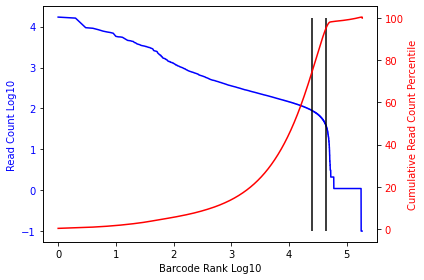

The read count cut off at the 75 th percentile is 87
The read count cut off at the 95 th percentile is 39
BB_test_Cos1053_JKLab0340_MM2B


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


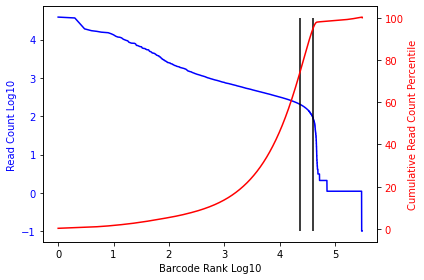

The read count cut off at the 75 th percentile is 201
The read count cut off at the 95 th percentile is 89
BB_test_Cos1053_oligodT_MM1B


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


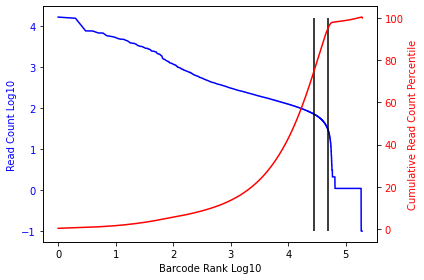

The read count cut off at the 75 th percentile is 71
The read count cut off at the 95 th percentile is 30
BB_test_Cos1053_oligodT_MM2B


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


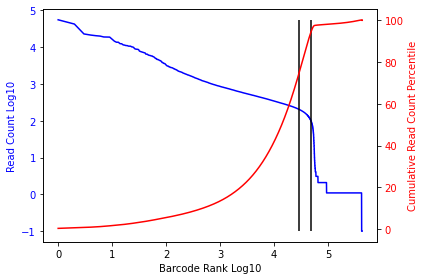

The read count cut off at the 75 th percentile is 204
The read count cut off at the 95 th percentile is 93
BB_RT_1_340_243_Cos1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


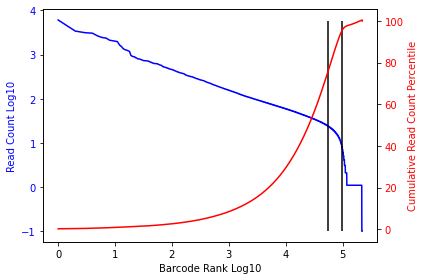

The read count cut off at the 75 th percentile is 24
The read count cut off at the 95 th percentile is 9
BB_RT_1_340_243_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


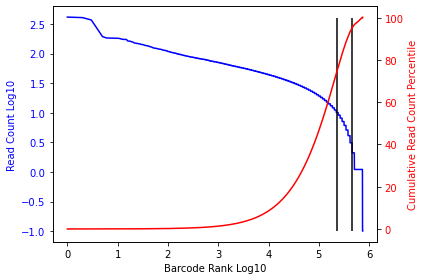

The read count cut off at the 75 th percentile is 10
The read count cut off at the 95 th percentile is 3
BB_RT_1_340_335_Cos1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


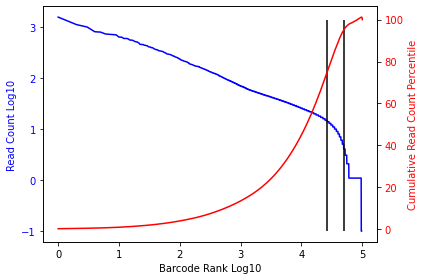

The read count cut off at the 75 th percentile is 14
The read count cut off at the 95 th percentile is 4
BB_RT_1_340_335_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


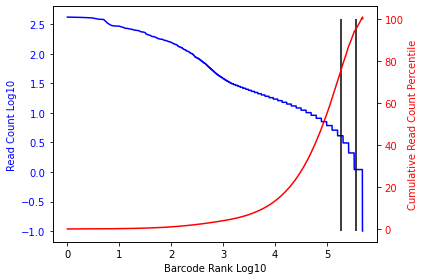

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 1
BB_RT_1b_340_243_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


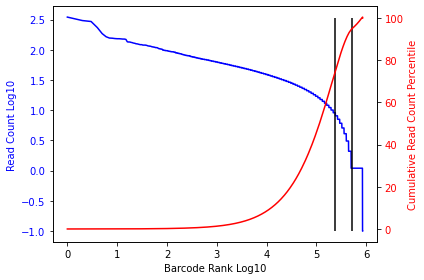

The read count cut off at the 75 th percentile is 8
The read count cut off at the 95 th percentile is 1
BB_RT_1b_340_335_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


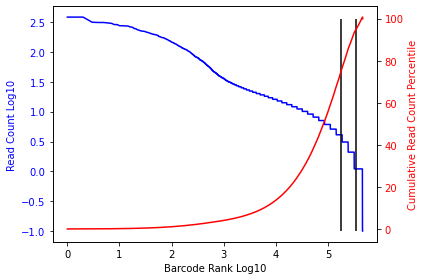

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 1
BB_RT_1b_ODT_243_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


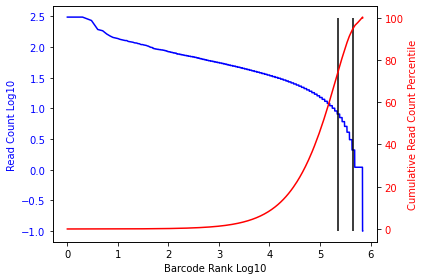

The read count cut off at the 75 th percentile is 8
The read count cut off at the 95 th percentile is 2
BB_RT_1b_ODT_335_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


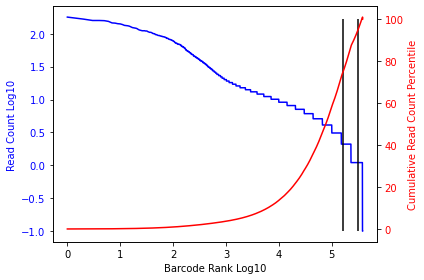

The read count cut off at the 75 th percentile is 2
The read count cut off at the 95 th percentile is 1
BB_RT_1_ODT_243_Cos1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


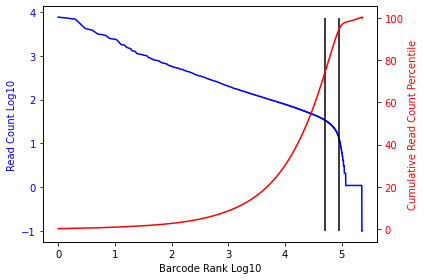

The read count cut off at the 75 th percentile is 33
The read count cut off at the 95 th percentile is 12
BB_RT_1_ODT_243_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


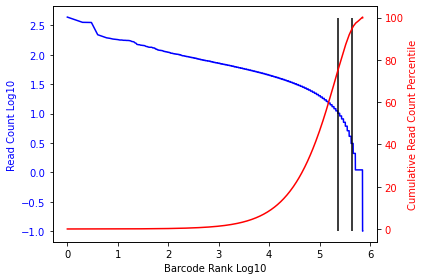

The read count cut off at the 75 th percentile is 10
The read count cut off at the 95 th percentile is 3
BB_RT_1_ODT_335_Cos1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


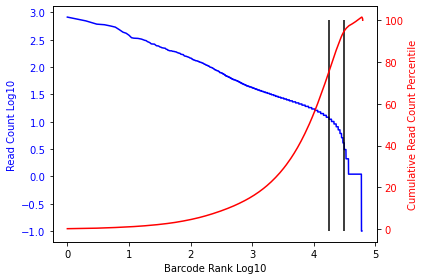

The read count cut off at the 75 th percentile is 12
The read count cut off at the 95 th percentile is 3
BB_RT_1_ODT_335_Hek1053


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


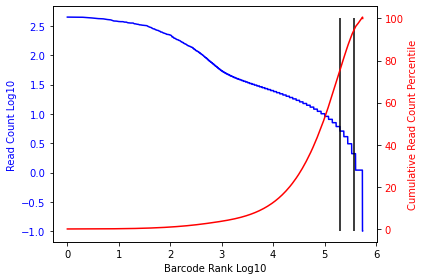

The read count cut off at the 75 th percentile is 6
The read count cut off at the 95 th percentile is 2
BB_RT_2_340_243_Cos1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


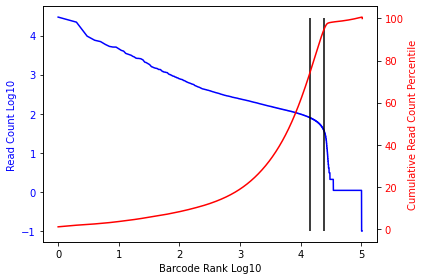

The read count cut off at the 75 th percentile is 78
The read count cut off at the 95 th percentile is 35
BB_RT_2_340_243_Hek1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


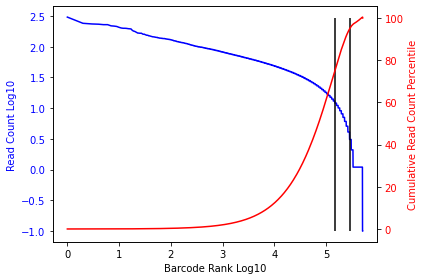

The read count cut off at the 75 th percentile is 12
The read count cut off at the 95 th percentile is 3
BB_RT_2_340_335_Cos1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


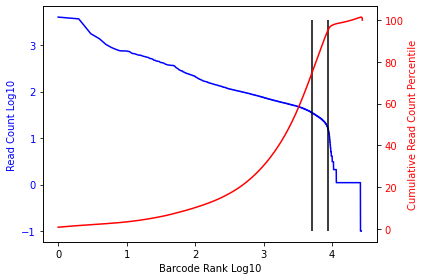

The read count cut off at the 75 th percentile is 35
The read count cut off at the 95 th percentile is 16
BB_RT_2_340_335_Hek1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


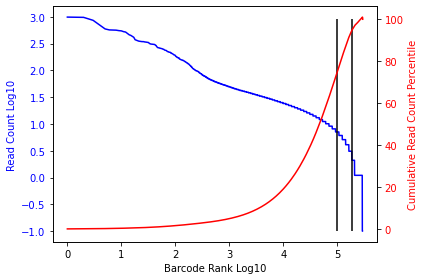

The read count cut off at the 75 th percentile is 7
The read count cut off at the 95 th percentile is 2
BB_RT_2_ODT_243_Cos1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


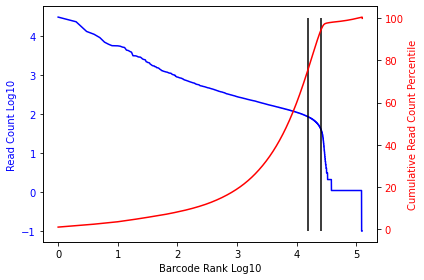

The read count cut off at the 75 th percentile is 87
The read count cut off at the 95 th percentile is 37
BB_RT_2_ODT_243_Hek1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


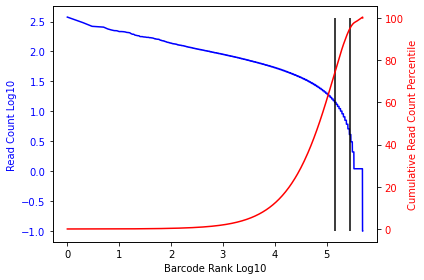

The read count cut off at the 75 th percentile is 14
The read count cut off at the 95 th percentile is 4
BB_RT_2_ODT_335_Cos1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


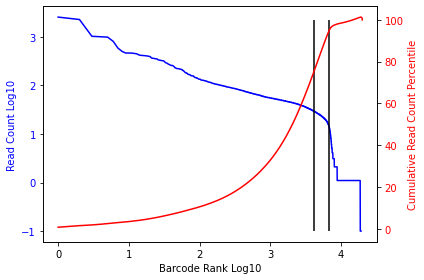

The read count cut off at the 75 th percentile is 29
The read count cut off at the 95 th percentile is 13
BB_RT_2_ODT_335_Hek1054


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


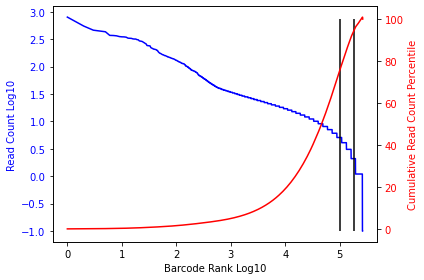

The read count cut off at the 75 th percentile is 5
The read count cut off at the 95 th percentile is 2
BB_RT_3_340_243_Cos1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


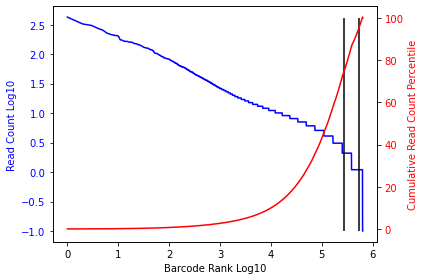

The read count cut off at the 75 th percentile is 2
The read count cut off at the 95 th percentile is 1
BB_RT_3_340_243_Hek1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


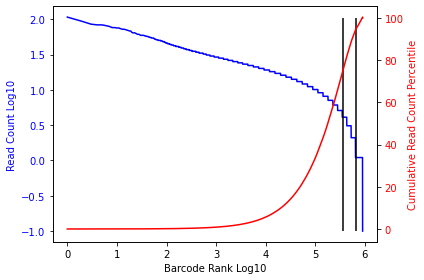

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 1
BB_RT_3_340_335_Cos1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


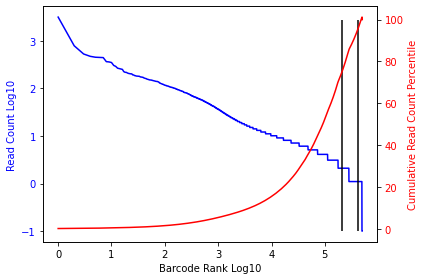

The read count cut off at the 75 th percentile is 2
The read count cut off at the 95 th percentile is 1
BB_RT_3_340_335_Hek1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


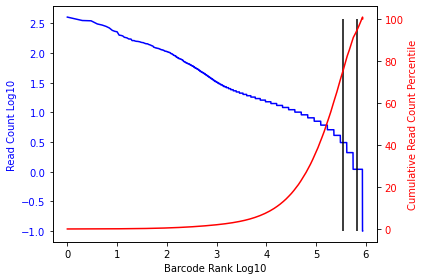

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 1
BB_RT_3_ODT_243_Cos1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


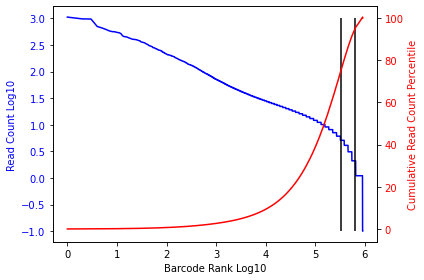

The read count cut off at the 75 th percentile is 5
The read count cut off at the 95 th percentile is 2
BB_RT_3_ODT_243_Hek1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


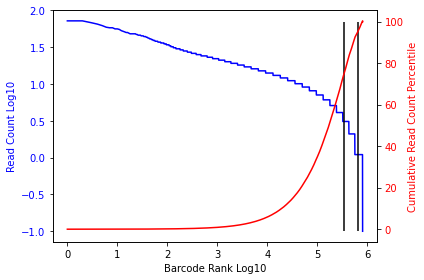

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 1
BB_RT_3_ODT_335_cos1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


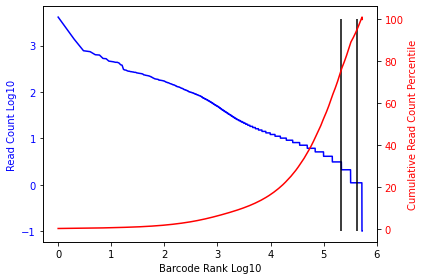

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 1
BB_RT_3_ODT_335_Hek1055


/home/smithcat/miniconda3/envs/splai3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


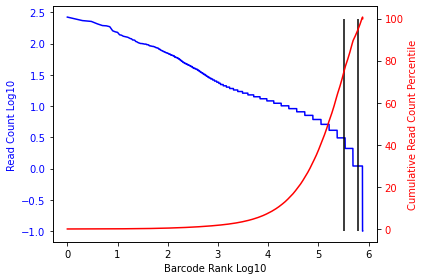

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 1


In [25]:
read_cut_unfilt_d = { 'sample': [],
                      '75_x': [],
                      '95_x': [],
                      '75_y': [],
                      '95_y': [], }

for samp in msamp_bcrnatbl_flen:
    
    print( samp )
    
    read_cut_unfilt_d[ 'sample' ].append( samp )
    
    x_cuts,y_cuts = sp.waterfall_plot( msamp_bcrnatbl_flen[ samp ],
                                       'usable_reads',
                                       [ 75, 95 ] )
    
    for cut in x_cuts:

        read_cut_unfilt_d[ str( cut ) + '_x' ].append( 10**( x_cuts[ cut ] ) )
        read_cut_unfilt_d[ str( cut ) + '_y' ].append( y_cuts[ cut ] )

In [26]:
read_cut_unfilt = pd.DataFrame( read_cut_unfilt_d )

In [27]:
for col in read_cut_unfilt.columns:
    
    if col.endswith( '_x' ):
        
        read_cut_unfilt[ col + '_log10' ] = np.log10( read_cut_unfilt[ col ].tolist() )

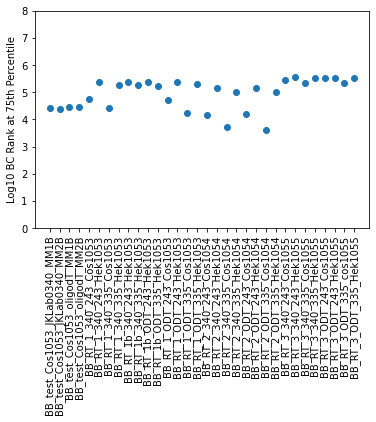

In [28]:
plt.scatter( read_cut_unfilt[ 'sample' ],
             read_cut_unfilt[ '75_x_log10' ] )

plt.xticks( rotation = 90 )

plt.ylabel( 'Log10 BC Rank at 75th Percentile' )

plt.ylim( 0, 8 )

plt.show()

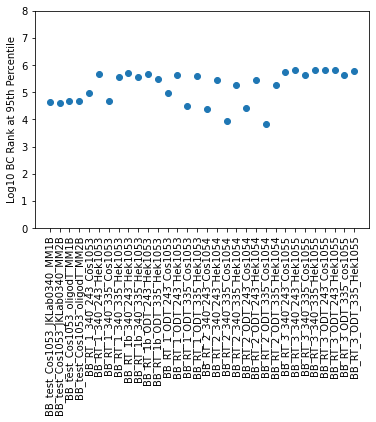

In [29]:
plt.scatter( read_cut_unfilt[ 'sample' ],
             read_cut_unfilt[ '95_x_log10' ] )

plt.xticks( rotation = 90 )

plt.ylabel( 'Log10 BC Rank at 95th Percentile' )

plt.ylim( 0, 8 )

plt.show()

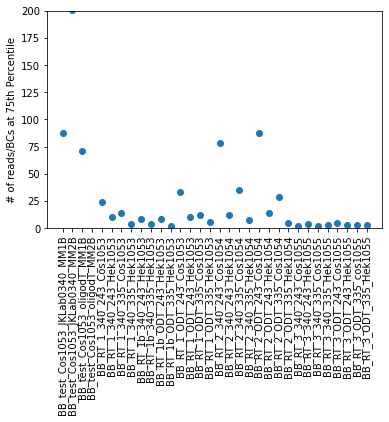

In [30]:
plt.scatter( read_cut_unfilt[ 'sample' ],
             read_cut_unfilt[ '75_y' ] )

plt.xticks( rotation = 90 )

plt.ylabel( '# of reads/BCs at 75th Percentile' )

plt.ylim( 0, 200 )

plt.show()

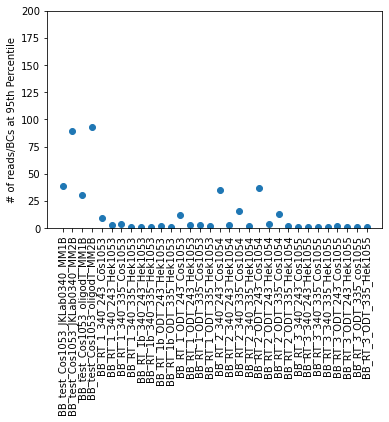

In [31]:
plt.scatter( read_cut_unfilt[ 'sample' ],
             read_cut_unfilt[ '95_y' ] )

plt.xticks( rotation = 90 )

plt.ylabel( '# of reads/BCs at 95th Percentile' )

plt.ylim( 0, 200 )

plt.show()

In [32]:
read_cut_unfilt[ 'oligoDT' ] = read_cut_unfilt[ 'sample' ].str.contains( '_ODT_' )

In [33]:
read_cut_unfilt[ 'Hek' ] = read_cut_unfilt[ 'sample' ].str.contains( '_Hek' )

In [34]:
read_cut_unfilt[ '243_synth' ] = read_cut_unfilt[ 'sample' ].str.contains( '_243_' )

In [35]:
read_cut_unfilt[ 'rep' ] = read_cut_unfilt[ 'sample' ].apply( lambda x: x.split( '_' )[ 2 ] )

In [36]:
read_cut_unfilt = read_cut_unfilt.loc[ ~( read_cut_unfilt[ 'sample' ].str.contains( 'test' ) ) ].copy()

In [37]:
read_cut_unfilt[ 'rep_num' ] = [ int( rep ) if rep != '1b' else 4 for rep in read_cut_unfilt.rep
                                 ] 

In [38]:
read_cut_unfilt

sample      75_x      95_x  75_y  95_y  75_x_log10  \
4    BB_RT_1_340_243_Cos1053   54514.0   96321.0    24     9    4.736508   
5    BB_RT_1_340_243_Hek1053  231887.0  453358.0    10     3    5.365276   
6    BB_RT_1_340_335_Cos1053   26481.0   49282.0    14     4    4.422934   
7    BB_RT_1_340_335_Hek1053  182202.0  355156.0     4     1    5.260553   
8   BB_RT_1b_340_243_Hek1053  241313.0  527582.0     8     1    5.382581   
9   BB_RT_1b_340_335_Hek1053  177658.0  346106.0     4     1    5.249585   
10  BB_RT_1b_ODT_243_Hek1053  231097.0  451648.0     8     2    5.363794   
11  BB_RT_1b_ODT_335_Hek1053  164858.0  316529.0     2     1    5.217110   
12   BB_RT_1_ODT_243_Cos1053   51603.0   90851.0    33    12    4.712675   
13   BB_RT_1_ODT_243_Hek1053  230755.0  444611.0    10     3    5.363151   
14   BB_RT_1_ODT_335_Cos1053   17408.0   31359.0    12     3    4.240749   
15   BB_RT_1_ODT_335_Hek1053  196110.0  380823.0     6     2    5.292500   
16   BB_RT_2_340_243_Cos1054   14411.0   24250.0    78    35    4.158694   
17   BB_RT_2_340_243_Hek1054  147536.0  287502.0    12     3    5.168898   
18   BB_RT_2_340_335_Cos1054    5143.0    8709.0    35    16    3.711217   
19   BB_RT_2_340_335_Hek1054  100115.0  188870.0     7     2    5.000499   
20   BB_RT_2_ODT_243_Cos1054   15261.0   26064.0    87    37    4.183583   
21   BB_RT_2_ODT_243_Hek1054  147058.0  280947.0    14     4    5.167489   
22   BB_RT_2_ODT_335_Cos1054    4113.0    6819.0    29    13    3.614159   
23   BB_RT_2_ODT_335_Hek1054   98989.0  185546.0     5     2    4.995587   
24   BB_RT_3_340_243_Cos1055  275726.0  530697.0     2     1    5.440478   
25   BB_RT_3_340_243_Hek1055  359736.0  672476.0     4     1    5.555984   
26   BB_RT_3_340_335_Cos1055  209068.0  409999.0     2     1    5.320288   
27   BB_RT_3_340_335_Hek1055  345589.0  677899.0     3     1    5.538560   
28   BB_RT_3_ODT_243_Cos1055  327908.0  635686.0     5     2    5.515752   
29   BB_RT_3_ODT_243_Hek1055  343407.0  640653.0     3     1    5.535809   
30   BB_RT_3_ODT_335_cos1055  208445.0  422726.0     3     1    5.318991   
31   BB_RT_3_ODT_335_Hek1055  325997.0  621576.0     3     1    5.513214   

    95_x_log10  oligoDT    Hek  243_synth rep  rep_num  
4     4.983721    False  False       True   1        1  
5     5.656441    False   True       True   1        1  
6     4.692688    False  False      False   1        1  
7     5.550419    False   True      False   1        1  
8     5.722290    False   True       True  1b        4  
9     5.539209    False   True      False  1b        4  
10    5.654800     True   True       True  1b        4  
11    5.500414     True   True      False  1b        4  
12    4.958330     True  False       True   1        1  
13    5.647980     True   True       True   1        1  
14    4.496362     True  False      False   1        1  
15    5.580723     True   True      False   1        1  
16    4.384712    False  False       True   2        2  
17    5.458641    False   True       True   2        2  
18    3.939968    False  False      False   2        2  
19    5.276163    False   True      False   2        2  
20    4.416041     True  False       True   2        2  
21    5.448624     True   True       True   2        2  
22    3.833721     True  False      False   2        2  
23    5.268452     True   True      False   2        2  
24    5.724847    False  False       True   3        3  
25    5.827677    False   True       True   3        3  
26    5.612783    False  False      False   3        3  
27    5.831165    False   True      False   3        3  
28    5.803243     True  False       True   3        3  
29    5.806623     True   True       True   3        3  
30    5.626059     True  False      False   3        3  
31    5.793494     True   True      False   3        3

In [39]:
read_cut_unfilt[ 'rep_2' ] = [ rep == 2 for rep in read_cut_unfilt.rep_num ]

In [40]:
read_cut_unfilt[ 'rep_1b' ] = [ rep == 4 for rep in read_cut_unfilt.rep_num ]

In [41]:
read_cut_unfilt[ 'rep_3' ] = [ rep == 3 for rep in read_cut_unfilt.rep_num ]

In [42]:
predictors = [ 'oligoDT', 'Hek', '243_synth', 'rep_1b', 'rep_2', 'rep_3' ]

In [43]:
unfilt_fit = LinearRegression().fit( read_cut_unfilt[ predictors ], read_cut_unfilt[ '95_x' ] ) 

In [44]:
unfilt_fit.coef_

array([  -6597.78571429,  238054.5       ,   82946.21428571,
         53718.875     , -111631.75      ,  338743.875     ])

In [ ]:
#so oligoDT results in 6500 fewer BCs,
#there are 238,054 more BCs in HEK cells,
#82,946 more BCs with 243 synthesis,
#rep1b has 53718 more bcs that rep1
#rep2 has 111,631 fewer bcs than rep1,
#rep3 has 338,743 more bcs than rep1

In [88]:
read_cut_unfilt.loc[ ~( read_cut_unfilt.oligoDT ) ]

sample      75_x      95_x  75_y  95_y  75_x_log10  \
4    BB_RT_1_340_243_Cos1053   54514.0   96321.0    24     9    4.736508   
5    BB_RT_1_340_243_Hek1053  231887.0  453358.0    10     3    5.365276   
6    BB_RT_1_340_335_Cos1053   26481.0   49282.0    14     4    4.422934   
7    BB_RT_1_340_335_Hek1053  182202.0  355156.0     4     1    5.260553   
8   BB_RT_1b_340_243_Hek1053  241313.0  527582.0     8     1    5.382581   
9   BB_RT_1b_340_335_Hek1053  177658.0  346106.0     4     1    5.249585   
16   BB_RT_2_340_243_Cos1054   14411.0   24250.0    78    35    4.158694   
17   BB_RT_2_340_243_Hek1054  147536.0  287502.0    12     3    5.168898   
18   BB_RT_2_340_335_Cos1054    5143.0    8709.0    35    16    3.711217   
19   BB_RT_2_340_335_Hek1054  100115.0  188870.0     7     2    5.000499   
24   BB_RT_3_340_243_Cos1055  275726.0  530697.0     2     1    5.440478   
25   BB_RT_3_340_243_Hek1055  359736.0  672476.0     4     1    5.555984   
26   BB_RT_3_340_335_Cos1055  209068.0  409999.0     2     1    5.320288   
27   BB_RT_3_340_335_Hek1055  345589.0  677899.0     3     1    5.538560   

    95_x_log10  oligoDT    Hek  243_synth rep  rep_num  rep_2  rep_1b  rep_3  
4     4.983721    False  False       True   1        1  False   False  False  
5     5.656441    False   True       True   1        1  False   False  False  
6     4.692688    False  False      False   1        1  False   False  False  
7     5.550419    False   True      False   1        1  False   False  False  
8     5.722290    False   True       True  1b        4  False    True  False  
9     5.539209    False   True      False  1b        4  False    True  False  
16    4.384712    False  False       True   2        2   True   False  False  
17    5.458641    False   True       True   2        2   True   False  False  
18    3.939968    False  False      False   2        2   True   False  False  
19    5.276163    False   True      False   2        2   True   False  False  
24    5.724847    False  False       True   3        3  False   False   True  
25    5.827677    False   True       True   3        3  False   False   True  
26    5.612783    False  False      False   3        3  False   False   True  
27    5.831165    False   True      False   3        3  False   False   True

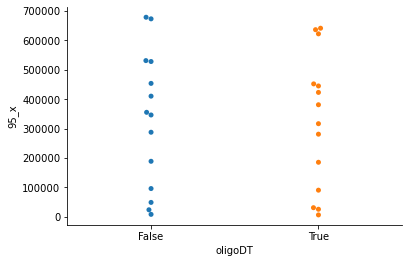

In [99]:
sns.swarmplot( x = 'oligoDT', y = '95_x', data = read_cut_unfilt )
sns.despine()

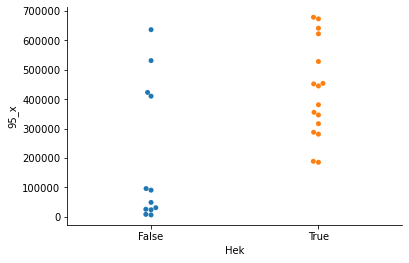

In [100]:
sns.swarmplot( x = 'Hek', y = '95_x', data = read_cut_unfilt )
sns.despine()

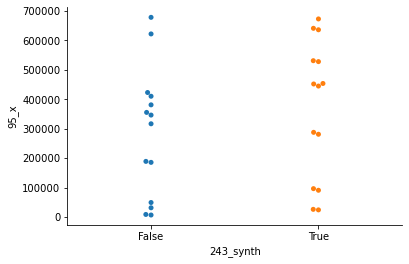

In [101]:
sns.swarmplot( x = '243_synth', y = '95_x', data = read_cut_unfilt )
sns.despine()

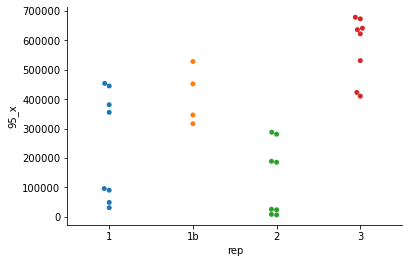

In [102]:
sns.swarmplot( x = 'rep', y = '95_x', data = read_cut_unfilt )
sns.despine()

In [104]:
read_cut_unfilt[ 'primer' ] = [ 'oligoDT' if oligo else '340' for oligo in read_cut_unfilt.oligoDT ]

In [105]:
read_cut_unfilt[ 'cell_type' ] = [ 'HEK' if hek else 'Cos' for hek in read_cut_unfilt.Hek ]

In [106]:
read_cut_unfilt[ 'synthesis' ] = [ '243' if synth else '335' for synth in read_cut_unfilt[ '243_synth' ] ]

In [109]:
read_cut_unfilt.to_csv( bdout + 'n_bcs_bysamp.2022-0510.txt',
                        sep = '\t',
                        index = False )

In [103]:
read_cut_unfilt

sample      75_x      95_x  75_y  95_y  75_x_log10  \
4    BB_RT_1_340_243_Cos1053   54514.0   96321.0    24     9    4.736508   
5    BB_RT_1_340_243_Hek1053  231887.0  453358.0    10     3    5.365276   
6    BB_RT_1_340_335_Cos1053   26481.0   49282.0    14     4    4.422934   
7    BB_RT_1_340_335_Hek1053  182202.0  355156.0     4     1    5.260553   
8   BB_RT_1b_340_243_Hek1053  241313.0  527582.0     8     1    5.382581   
9   BB_RT_1b_340_335_Hek1053  177658.0  346106.0     4     1    5.249585   
10  BB_RT_1b_ODT_243_Hek1053  231097.0  451648.0     8     2    5.363794   
11  BB_RT_1b_ODT_335_Hek1053  164858.0  316529.0     2     1    5.217110   
12   BB_RT_1_ODT_243_Cos1053   51603.0   90851.0    33    12    4.712675   
13   BB_RT_1_ODT_243_Hek1053  230755.0  444611.0    10     3    5.363151   
14   BB_RT_1_ODT_335_Cos1053   17408.0   31359.0    12     3    4.240749   
15   BB_RT_1_ODT_335_Hek1053  196110.0  380823.0     6     2    5.292500   
16   BB_RT_2_340_243_Cos1054   14411.0   24250.0    78    35    4.158694   
17   BB_RT_2_340_243_Hek1054  147536.0  287502.0    12     3    5.168898   
18   BB_RT_2_340_335_Cos1054    5143.0    8709.0    35    16    3.711217   
19   BB_RT_2_340_335_Hek1054  100115.0  188870.0     7     2    5.000499   
20   BB_RT_2_ODT_243_Cos1054   15261.0   26064.0    87    37    4.183583   
21   BB_RT_2_ODT_243_Hek1054  147058.0  280947.0    14     4    5.167489   
22   BB_RT_2_ODT_335_Cos1054    4113.0    6819.0    29    13    3.614159   
23   BB_RT_2_ODT_335_Hek1054   98989.0  185546.0     5     2    4.995587   
24   BB_RT_3_340_243_Cos1055  275726.0  530697.0     2     1    5.440478   
25   BB_RT_3_340_243_Hek1055  359736.0  672476.0     4     1    5.555984   
26   BB_RT_3_340_335_Cos1055  209068.0  409999.0     2     1    5.320288   
27   BB_RT_3_340_335_Hek1055  345589.0  677899.0     3     1    5.538560   
28   BB_RT_3_ODT_243_Cos1055  327908.0  635686.0     5     2    5.515752   
29   BB_RT_3_ODT_243_Hek1055  343407.0  640653.0     3     1    5.535809   
30   BB_RT_3_ODT_335_cos1055  208445.0  422726.0     3     1    5.318991   
31   BB_RT_3_ODT_335_Hek1055  325997.0  621576.0     3     1    5.513214   

    95_x_log10  oligoDT    Hek  243_synth rep  rep_num  rep_2  rep_1b  rep_3  
4     4.983721    False  False       True   1        1  False   False  False  
5     5.656441    False   True       True   1        1  False   False  False  
6     4.692688    False  False      False   1        1  False   False  False  
7     5.550419    False   True      False   1        1  False   False  False  
8     5.722290    False   True       True  1b        4  False    True  False  
9     5.539209    False   True      False  1b        4  False    True  False  
10    5.654800     True   True       True  1b        4  False    True  False  
11    5.500414     True   True      False  1b        4  False    True  False  
12    4.958330     True  False       True   1        1  False   False  False  
13    5.647980     True   True       True   1        1  False   False  False  
14    4.496362     True  False      False   1        1  False   False  False  
15    5.580723     True   True      False   1        1  False   False  False  
16    4.384712    False  False       True   2        2   True   False  False  
17    5.458641    False   True       True   2        2   True   False  False  
18    3.939968    False  False      False   2        2   True   False  False  
19    5.276163    False   True      False   2        2   True   False  False  
20    4.416041     True  False       True   2        2   True   False  False  
21    5.448624     True   True       True   2        2   True   False  False  
22    3.833721     True  False      False   2        2   True   False  False  
23    5.268452     True   True      False   2        2   True   False  False  
24    5.724847    False  False       True   3        3  False   False   True  
25    5.827677    False   True       True   3        3  False   False   True  


In [39]:
cut_dict = { samp: cut for samp,cut in zip( read_cut_unfilt[ 'sample' ], read_cut_unfilt[ '95_y' ] ) }

In [40]:
msamp_varbcrnatbl_flen_allisos = { lib: { samp: mbcs.merge_subasm_and_rna_tbls( satbl_fn[ lib ],
                                                                                msamp_bcrnatbl_flen[ samp ] )
                                           for samp in msamp_bcrnatbl_flen
                                           if lib.replace( 'JKP', '' ) in samp }
                                   for lib in satbl_fn }

In [41]:
msamp_varbcrnatbl_flen_allisos[ 'JKP1053' ][ 'BB_test_Cos1053_JKLab0340_MM1B' ].head()

passes                              status  \
AAAAAACAAGCGGCTACTGATGG   False  possible_chimeric_no_major_variant   
AAAAAACATTTTAGCAGCGTTGG   False  possible_chimeric_no_major_variant   
AAAAAATCAAACGGGGTAGATGG   False  possible_chimeric_no_major_variant   
AAAAAATGCCTCGTAAGCGATGG   False  possible_chimeric_no_major_variant   
AAAAACCGGGCATACTATGATGG   False  possible_chimeric_no_major_variant   

                         n_variants_passing                     variant_list  \
AAAAAACAAGCGGCTACTGATGG                   1                  jkp815:1230:T:C   
AAAAAACATTTTAGCAGCGTTGG                   1                  jkp815:1272:A:T   
AAAAAATCAAACGGGGTAGATGG                   2  jkp815:1311:C:T,jkp815:1320:C:T   
AAAAAATGCCTCGTAAGCGATGG                   1                  jkp815:1264:T:A   
AAAAACCGGGCATACTATGATGG                   1                  jkp815:1323:C:T   

                         num_reads  unpaired_reads  secondary_reads  \
AAAAAACAAGCGGCTACTGATGG         51               0                0   
AAAAAACATTTTAGCAGCGTTGG        151               0                0   
AAAAAATCAAACGGGGTAGATGG         59               0                0   
AAAAAATGCCTCGTAAGCGATGG         24               0                0   
AAAAACCGGGCATACTATGATGG         85               0                0   

                         unmapped_reads  bad_starts  bad_ends  ...  iso5172  \
AAAAAACAAGCGGCTACTGATGG               0           0         0  ...        0   
AAAAAACATTTTAGCAGCGTTGG               0           0         0  ...        0   
AAAAAATCAAACGGGGTAGATGG               0           0         0  ...        0   
AAAAAATGCCTCGTAAGCGATGG               0           0         0  ...        0   
AAAAACCGGGCATACTATGATGG               0           0         0  ...        0   

                         iso5181  iso5227  iso5343  iso5399  iso5428  iso5488  \
AAAAAACAAGCGGCTACTGATGG        0        0        0        0        0        0   
AAAAAACATTTTAGCAGCGTTGG        0        0        0        0        0        0   
AAAAAATCAAACGGGGTAGATGG        0        0        0        0        0        0   
AAAAAATGCCTCGTAAGCGATGG        0        0        0        0        0        0   
AAAAACCGGGCATACTATGATGG        0        0        0        0        0        0   

                         iso6100  iso6321  usable_reads  
AAAAAACAAGCGGCTACTGATGG        0        0            51  
AAAAAACATTTTAGCAGCGTTGG        0        0           151  
AAAAAATCAAACGGGGTAGATGG        0        0            59  
AAAAAATGCCTCGTAAGCGATGG        0        0            24  
AAAAACCGGGCATACTATGATGG        0        0            85  

[5 rows x 78 columns]

In [42]:
%%time
for lib in msamp_varbcrnatbl_flen_allisos:

    for samp in msamp_varbcrnatbl_flen_allisos[ lib ]:
    
        msamp_varbcrnatbl_flen_allisos[ lib ][ samp ].to_csv( bdout + samp + '_wt1_ex9_by_bc_effects_allvars_allisos-2022-0503.txt',
                                                               sep='\t'
                                                              )

CPU times: user 2min 37s, sys: 10.7 s, total: 2min 47s
Wall time: 3min 8s


In [43]:
isonamedict = { 'KTS+': [ (1267, 1359) ],
                'KTS-': [ (1267, 1350) ],
                'SKIP': [] }

In [44]:
namedisogrps = { samp: jn.create_named_isogrps( isogrpdict[ samp ],
                                                isonamedict,
                                                [],
                                                28,
                                                150,
                                                3 )
                for samp in isogrpdict }

In [45]:
msamp_bcrnatbl_flen_rename = { samp: jn.combine_isogrps_pe( namedisogrps[ samp ],
                                                            msamp_bcrnatbl_flen[ samp ] ) 
                               for samp in namedisogrps }

0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this process.
Columns:  []
0 columns will be removed during this pr

In [46]:
msamp_bcrnatbl_flen_rename[ 'BB_test_Cos1053_JKLab0340_MM1B' ]

num_reads  secondary_reads  unpaired_reads  \
barcode                                                                
AAAAAACAAGCGGCTACTGATGG          51                0               0   
AAAAAACAAGCGGCTACTTATGG           1                0               0   
AAAAAACATTGTAGCAGCGTTGG           1                0               0   
AAAAAACATTTGAGCAGCGTTGG           1                0               0   
AAAAAACATTTTAGCAGCGTTGG         151                0               0   
...                             ...              ...             ...   
TTTTTTTTTGACAGTAGGTTGG            2                0               0   
TTTTTTTTTGCTAGACGATGATGG          2                0               0   
TTTTTTTTTTCCTGCATATTATGG         15                0               0   
TTTTTTTTTTTGCACTGGGATGG           1                0               0   
TTTTTTTTTTTTTTTTTAGGTGG           1                0               0   

                          unmapped_reads  bad_starts  bad_ends  soft_clipped  \
barcode                                                                        
AAAAAACAAGCGGCTACTGATGG                0           0         0             0   
AAAAAACAAGCGGCTACTTATGG                0           0         0             0   
AAAAAACATTGTAGCAGCGTTGG                0           0         0             0   
AAAAAACATTTGAGCAGCGTTGG                0           0         0             0   
AAAAAACATTTTAGCAGCGTTGG                0           0         0             0   
...                                  ...         ...       ...           ...   
TTTTTTTTTGACAGTAGGTTGG                 0           0         0             0   
TTTTTTTTTGCTAGACGATGATGG               0           0         0             0   
TTTTTTTTTTCCTGCATATTATGG               0           0         0             0   
TTTTTTTTTTTGCACTGGGATGG                0           0         0             0   
TTTTTTTTTTTTTTTTTAGGTGG                0           0         0             0   

                          other_isoform  usable_reads  KTS+  KTS-  SKIP  \
barcode                                                                   
AAAAAACAAGCGGCTACTGATGG               0            51    49     2     0   
AAAAAACAAGCGGCTACTTATGG               0             1     1     0     0   
AAAAAACATTGTAGCAGCGTTGG               0             1     1     0     0   
AAAAAACATTTGAGCAGCGTTGG               0             1     1     0     0   
AAAAAACATTTTAGCAGCGTTGG               0           151   144     5     0   
...                                 ...           ...   ...   ...   ...   
TTTTTTTTTGACAGTAGGTTGG                0             2     1     0     1   
TTTTTTTTTGCTAGACGATGATGG              0             2     2     0     0   
TTTTTTTTTTCCTGCATATTATGG              0            15    15     0     0   
TTTTTTTTTTTGCACTGGGATGG               0             1     1     0     0   
TTTTTTTTTTTTTTTTTAGGTGG               0             1     0     1     0   

                          OTHER  KTS+_psi  KTS-_psi  SKIP_psi  OTHER_psi  
barcode                                                                   
AAAAAACAAGCGGCTACTGATGG       0  0.960784  0.039216       0.0   0.000000  
AAAAAACAAGCGGCTACTTATGG       0  1.000000  0.000000       0.0   0.000000  
AAAAAACATTGTAGCAGCGTTGG       0  1.000000  0.000000       0.0   0.000000  
AAAAAACATTTGAGCAGCGTTGG       0  1.000000  0.000000       0.0   0.000000  
AAAAAACATTTTAGCAGCGTTGG       2  0.953642  0.033113       0.0   0.013245  
...                         ...       ...       ...       ...        ...  
TTTTTTTTTGACAGTAGGTTGG        0  0.500000  0.000000       0.5   0.000000  
TTTTTTTTTGCTAGACGATGATGG      0  1.000000  0.000000       0.0   0.000000  
TTTTTTTTTTCCTGCATATTATGG      0  1.000000  0.000000       0.0   0.000000  
TTTTTTTTTTTGCACTGGGATGG       0  1.000000  0.000000       0.0   0.000000  
TTTTTTTTTTTTTTTTTAGGTGG       0  0.000000  1.000000       0.0   0.000000  

[167972 rows x 17 columns]

In [47]:
msamp_varbcrnatbl_flen_rename = { lib: { samp: mbcs.merge_subasm_and_rna_tbls( satbl_fn[ lib ],
                                                                                msamp_bcrnatbl_flen_rename[ samp ] )
                                          for samp in msamp_bcrnatbl_flen_rename
                                          if lib.replace( 'JKP', '' ) in samp }
                                  for lib in satbl_fn }

In [48]:
msamp_varbcrnatbl_flen_rename[ 'JKP1053' ][ 'BB_test_Cos1053_JKLab0340_MM1B' ]

passes                              status  \
AAAAAACAAGCGGCTACTGATGG    False  possible_chimeric_no_major_variant   
AAAAAACATTTTAGCAGCGTTGG    False  possible_chimeric_no_major_variant   
AAAAAATCAAACGGGGTAGATGG    False  possible_chimeric_no_major_variant   
AAAAAATGCCTCGTAAGCGATGG    False  possible_chimeric_no_major_variant   
AAAAACCGGGCATACTATGATGG    False  possible_chimeric_no_major_variant   
...                          ...                                 ...   
TTTTTTTTCACGTGCGTTCTCTGG    True                                pass   
TTTTTTTTCATCCGTGTATATGG    False  possible_chimeric_no_major_variant   
TTTTTTTTGATCGGTGACAGTGG    False  possible_chimeric_no_major_variant   
TTTTTTTTGCTAGACGATGATGG     True                   no_variants_input   
TTTTTTTTTCCTGCATATTATGG     True                   no_variants_input   

                          n_variants_passing  \
AAAAAACAAGCGGCTACTGATGG                    1   
AAAAAACATTTTAGCAGCGTTGG                    1   
AAAAAATCAAACGGGGTAGATGG                    2   
AAAAAATGCCTCGTAAGCGATGG                    1   
AAAAACCGGGCATACTATGATGG                    1   
...                                      ...   
TTTTTTTTCACGTGCGTTCTCTGG                   1   
TTTTTTTTCATCCGTGTATATGG                    2   
TTTTTTTTGATCGGTGACAGTGG                    1   
TTTTTTTTGCTAGACGATGATGG                    0   
TTTTTTTTTCCTGCATATTATGG                    0   

                                                      variant_list  num_reads  \
AAAAAACAAGCGGCTACTGATGG                            jkp815:1230:T:C         51   
AAAAAACATTTTAGCAGCGTTGG                            jkp815:1272:A:T        151   
AAAAAATCAAACGGGGTAGATGG            jkp815:1311:C:T,jkp815:1320:C:T         59   
AAAAAATGCCTCGTAAGCGATGG                            jkp815:1264:T:A         24   
AAAAACCGGGCATACTATGATGG                            jkp815:1323:C:T         85   
...                                                            ...        ...   
TTTTTTTTCACGTGCGTTCTCTGG                           jkp815:1397:T:A        157   
TTTTTTTTCATCCGTGTATATGG   jkp815:1229:T:G,jkp815:1365:TAAACT:TAACT        123   
TTTTTTTTGATCGGTGACAGTGG                            jkp815:1241:A:T         10   
TTTTTTTTGCTAGACGATGATGG                                        NaN         48   
TTTTTTTTTCCTGCATATTATGG                                        NaN        123   

                          secondary_reads  unpaired_reads  unmapped_reads  \
AAAAAACAAGCGGCTACTGATGG                 0               0               0   
AAAAAACATTTTAGCAGCGTTGG                 0               0               0   
AAAAAATCAAACGGGGTAGATGG                 0               0               0   
AAAAAATGCCTCGTAAGCGATGG                 0               0               0   
AAAAACCGGGCATACTATGATGG                 0               0               0   
...                                   ...             ...             ...   
TTTTTTTTCACGTGCGTTCTCTGG                0               0               0   
TTTTTTTTCATCCGTGTATATGG                 0               0               0   
TTTTTTTTGATCGGTGACAGTGG                 0               0               0   
TTTTTTTTGCTAGACGATGATGG                 0               0               0   
TTTTTTTTTCCTGCATATTATGG                 0               0               0   

                          bad_starts  bad_ends  ...  other_isoform  \
AAAAAACAAGCGGCTACTGATGG            0         0  ...              0   
AAAAAACATTTTAGCAGCGTTGG            0         0  ...              0   
AAAAAATCAAACGGGGTAGATGG            0         0  ...              0   
AAAAAATGCCTCGTAAGCGATGG            0         0  ...              0   
AAAAACCGGGCATACTATGATGG            0         0  ...              0   
...                              ...       ...  ...            ...   
TTTTTTTTCACGTGCGTTCTCTGG           1         0  ...              0   
TTTTTTTTCATCCGTGTATATGG            0         0  ...              0   
TTTTTTTTGATCGGTGACAGTGG            0         0  ...     

In [49]:
msamp_varbcrnatbl_flen_rename_filt = { lib: { samp: msamp_varbcrnatbl_flen_rename[ lib ][ samp ].loc[ msamp_varbcrnatbl_flen_rename[ lib ][ samp ].usable_reads > cut_dict[ samp ] ].copy()
                                              for samp in msamp_varbcrnatbl_flen_rename[ lib ] } 
                                       for lib in msamp_varbcrnatbl_flen_rename }

In [50]:
%%time
bybcvartbl_filt_long = { lib: mbcs.combine_rep_perbctbls_long( [ msamp_varbcrnatbl_flen_rename_filt[ lib ][ samp ] for samp in msamp_varbcrnatbl_flen_rename_filt[ lib ] ],
                                                          [ samp for samp in msamp_varbcrnatbl_flen_rename_filt[ lib ] ] )
                    for lib in msamp_varbcrnatbl_flen_rename_filt }

CPU times: user 2.8 s, sys: 2.49 s, total: 5.29 s
Wall time: 5.29 s


BB_test_Cos1053_JKLab0340_MM1B


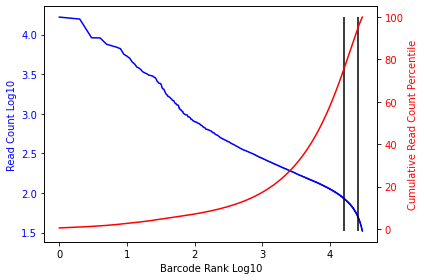

The read count cut off at the 75 th percentile is 86
The read count cut off at the 95 th percentile is 50
BB_test_Cos1053_JKLab0340_MM2B


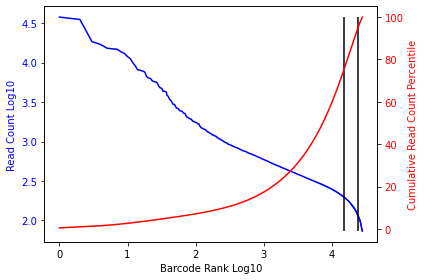

The read count cut off at the 75 th percentile is 198
The read count cut off at the 95 th percentile is 114
BB_test_Cos1053_oligodT_MM1B


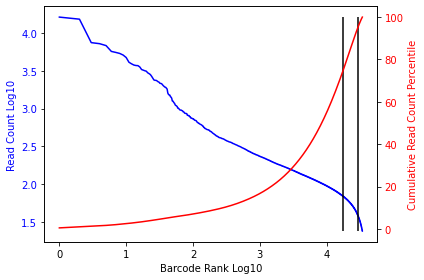

The read count cut off at the 75 th percentile is 69
The read count cut off at the 95 th percentile is 39
BB_test_Cos1053_oligodT_MM2B


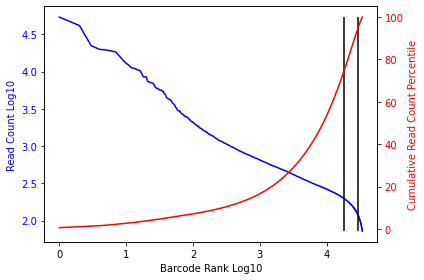

The read count cut off at the 75 th percentile is 196
The read count cut off at the 95 th percentile is 117
BB_RT_1_340_243_Cos1053


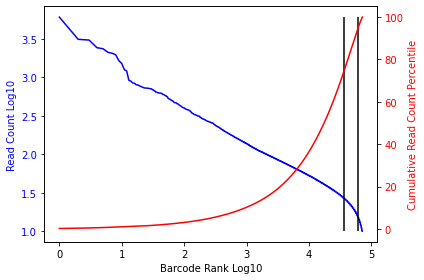

The read count cut off at the 75 th percentile is 27
The read count cut off at the 95 th percentile is 15
BB_RT_1_340_243_Hek1053


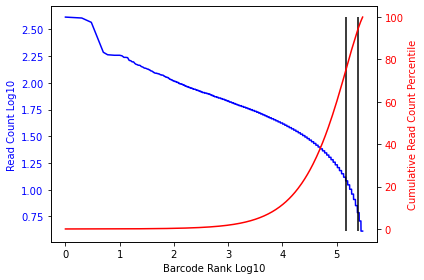

The read count cut off at the 75 th percentile is 12
The read count cut off at the 95 th percentile is 6
BB_RT_1_340_335_Cos1053


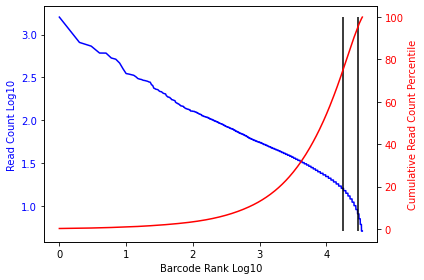

The read count cut off at the 75 th percentile is 16
The read count cut off at the 95 th percentile is 8
BB_RT_1_340_335_Hek1053


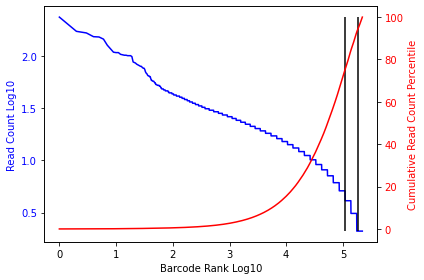

The read count cut off at the 75 th percentile is 5
The read count cut off at the 95 th percentile is 2
BB_RT_1b_340_243_Hek1053


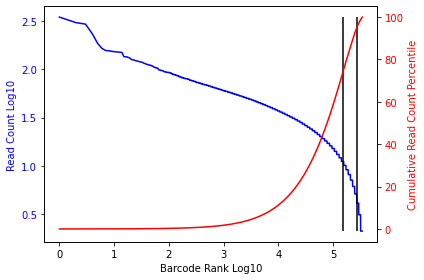

The read count cut off at the 75 th percentile is 11
The read count cut off at the 95 th percentile is 4
BB_RT_1b_340_335_Hek1053


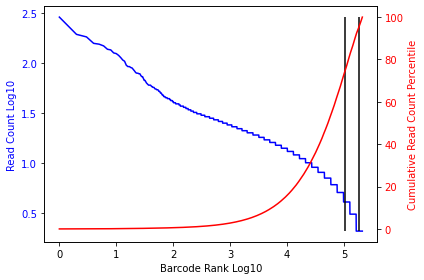

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 2
BB_RT_1b_ODT_243_Hek1053


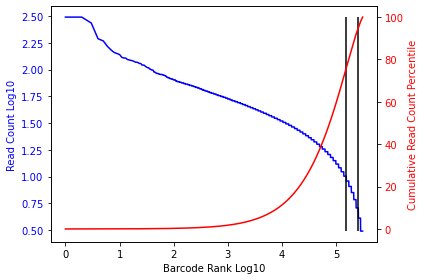

The read count cut off at the 75 th percentile is 10
The read count cut off at the 95 th percentile is 5
BB_RT_1b_ODT_335_Hek1053


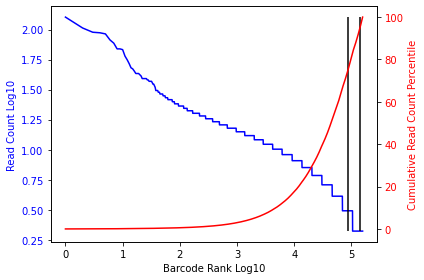

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 2
BB_RT_1_ODT_243_Cos1053


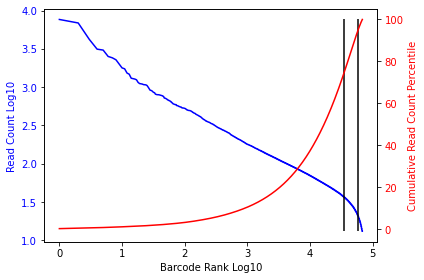

The read count cut off at the 75 th percentile is 36
The read count cut off at the 95 th percentile is 21
BB_RT_1_ODT_243_Hek1053


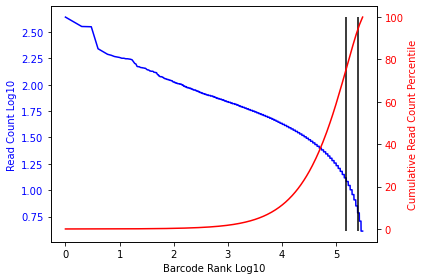

The read count cut off at the 75 th percentile is 13
The read count cut off at the 95 th percentile is 6
BB_RT_1_ODT_335_Cos1053


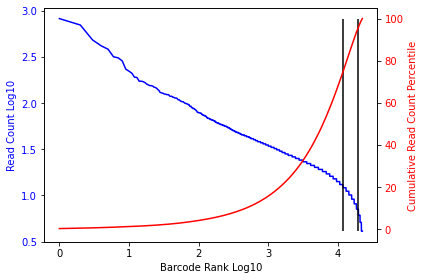

The read count cut off at the 75 th percentile is 12
The read count cut off at the 95 th percentile is 7
BB_RT_1_ODT_335_Hek1053


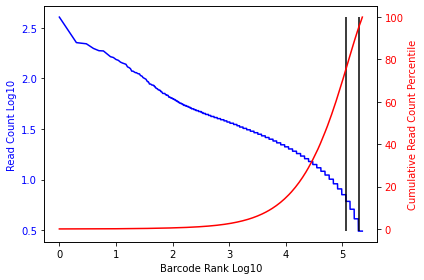

The read count cut off at the 75 th percentile is 7
The read count cut off at the 95 th percentile is 3
BB_RT_2_340_243_Cos1054


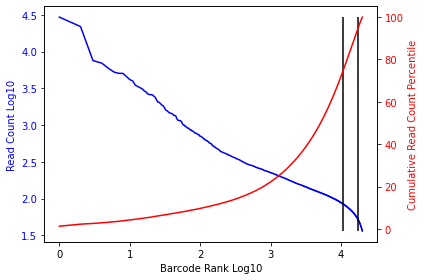

The read count cut off at the 75 th percentile is 84
The read count cut off at the 95 th percentile is 51
BB_RT_2_340_243_Hek1054


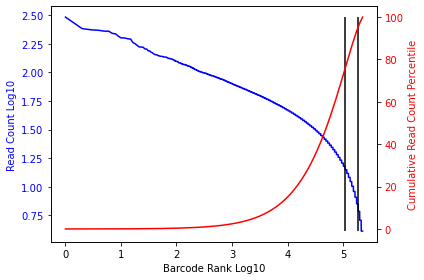

The read count cut off at the 75 th percentile is 15
The read count cut off at the 95 th percentile is 7
BB_RT_2_340_335_Cos1054


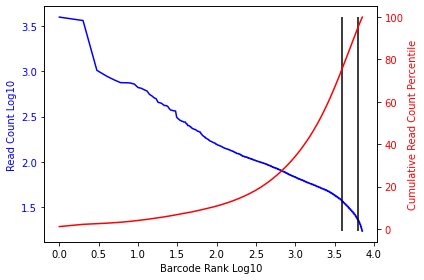

The read count cut off at the 75 th percentile is 37
The read count cut off at the 95 th percentile is 23
BB_RT_2_340_335_Hek1054


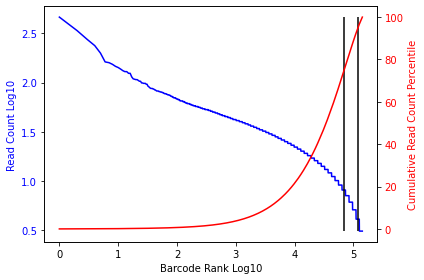

The read count cut off at the 75 th percentile is 8
The read count cut off at the 95 th percentile is 4
BB_RT_2_ODT_243_Cos1054


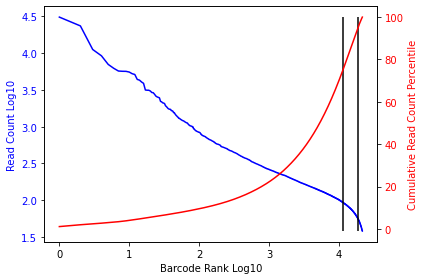

The read count cut off at the 75 th percentile is 93
The read count cut off at the 95 th percentile is 56
BB_RT_2_ODT_243_Hek1054


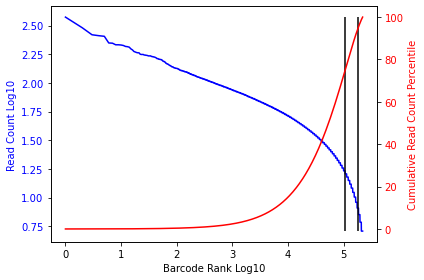

The read count cut off at the 75 th percentile is 16
The read count cut off at the 95 th percentile is 8
BB_RT_2_ODT_335_Cos1054


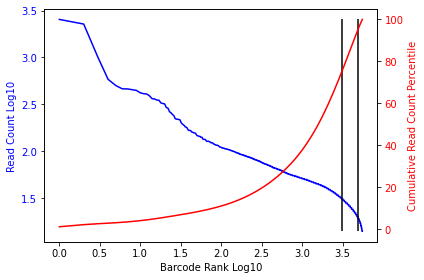

The read count cut off at the 75 th percentile is 31
The read count cut off at the 95 th percentile is 20
BB_RT_2_ODT_335_Hek1054


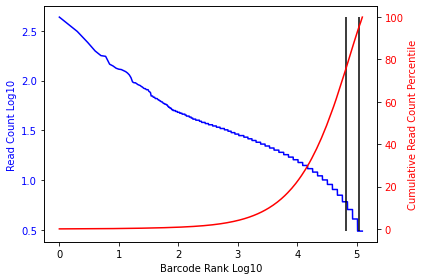

The read count cut off at the 75 th percentile is 6
The read count cut off at the 95 th percentile is 3
BB_RT_3_340_243_Cos1055


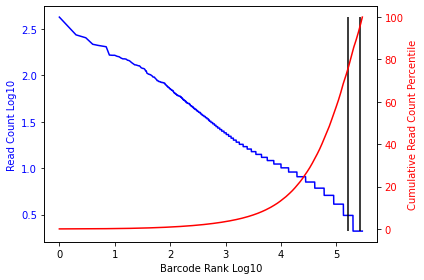

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 2
BB_RT_3_340_243_Hek1055


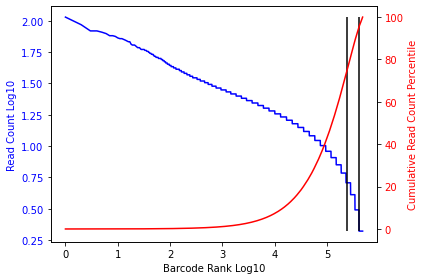

The read count cut off at the 75 th percentile is 5
The read count cut off at the 95 th percentile is 3
BB_RT_3_340_335_Cos1055


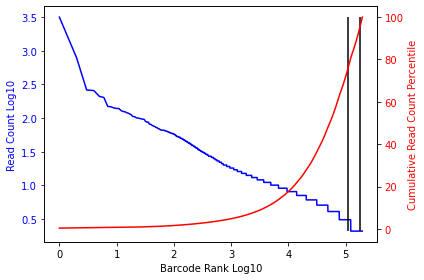

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 2
BB_RT_3_340_335_Hek1055


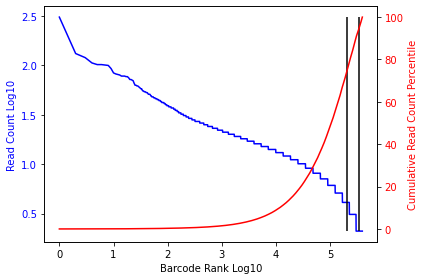

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 2
BB_RT_3_ODT_243_Cos1055


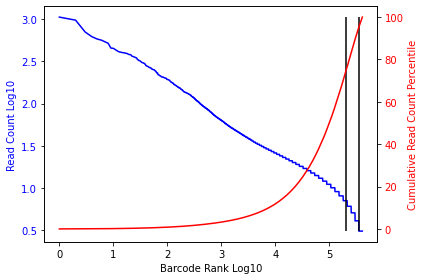

The read count cut off at the 75 th percentile is 7
The read count cut off at the 95 th percentile is 4
BB_RT_3_ODT_243_Hek1055


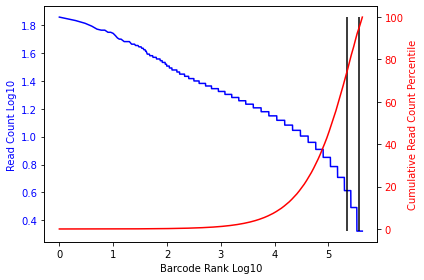

The read count cut off at the 75 th percentile is 4
The read count cut off at the 95 th percentile is 2
BB_RT_3_ODT_335_cos1055


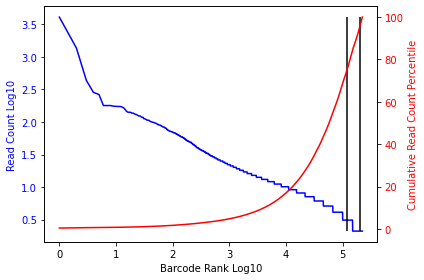

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 2
BB_RT_3_ODT_335_Hek1055


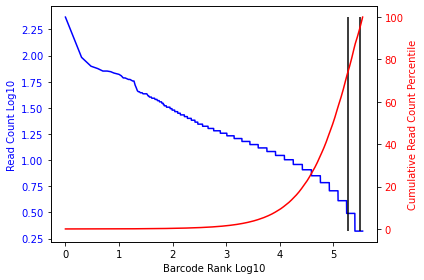

The read count cut off at the 75 th percentile is 3
The read count cut off at the 95 th percentile is 2


In [51]:
read_cut_filt_d = { 'sample': [],
                      '75_x': [],
                      '95_x': [],
                      '75_y': [],
                      '95_y': [], }

for lib in bybcvartbl_filt_long:

    for samp in bybcvartbl_filt_long[ lib ][ 'sample' ].unique():
    
        print( samp )
    
        read_cut_filt_d[ 'sample' ].append( samp )
    
        x_cuts,y_cuts = sp.waterfall_plot( bybcvartbl_filt_long[ lib ].loc[ bybcvartbl_filt_long[ lib ][ 'sample' ] == samp ],
                                           'usable_reads',
                                           [ 75, 95 ] )
    
        for cut in x_cuts:

            read_cut_filt_d[ str( cut ) + '_x' ].append( 10**( x_cuts[ cut ] ) )
            read_cut_filt_d[ str( cut ) + '_y' ].append( y_cuts[ cut ] )

In [52]:
read_cut_filt = pd.DataFrame( read_cut_filt_d )

In [53]:
for col in read_cut_filt.columns:
    
    if col.endswith( '_x' ):
        
        read_cut_filt[ col + '_log10' ] = np.log10( read_cut_filt[ col ].tolist() )

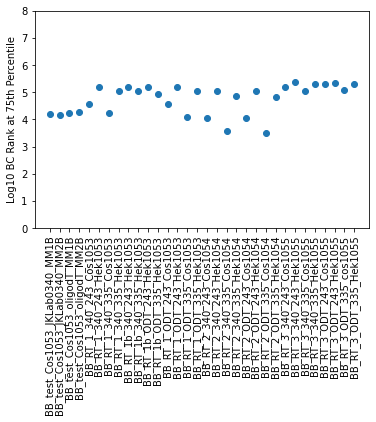

In [54]:
plt.scatter( read_cut_filt[ 'sample' ],
             read_cut_filt[ '75_x_log10' ] )

plt.xticks( rotation = 90 )

plt.ylabel( 'Log10 BC Rank at 75th Percentile' )

plt.ylim( 0, 8 )

plt.show()

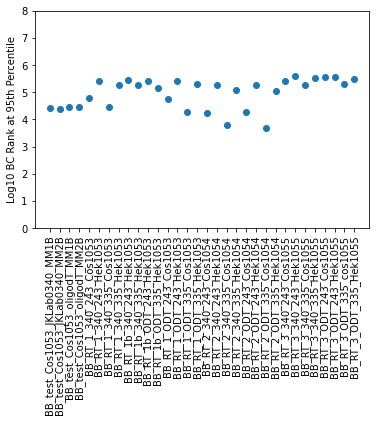

In [55]:
plt.scatter( read_cut_filt[ 'sample' ],
             read_cut_filt[ '95_x_log10' ] )

plt.xticks( rotation = 90 )

plt.ylabel( 'Log10 BC Rank at 95th Percentile' )

plt.ylim( 0, 8 )

plt.show()

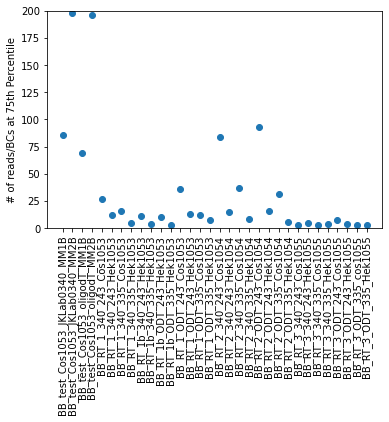

In [56]:
plt.scatter( read_cut_filt[ 'sample' ],
             read_cut_filt[ '75_y' ] )

plt.xticks( rotation = 90 )

plt.ylabel( '# of reads/BCs at 75th Percentile' )

plt.ylim( 0, 200 )

plt.show()

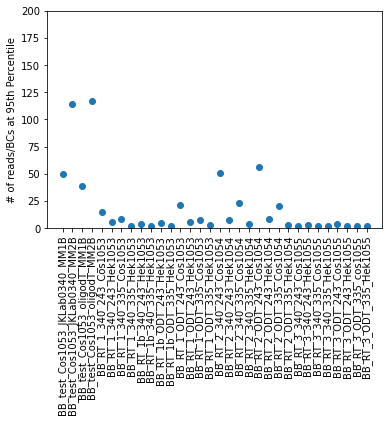

In [57]:
plt.scatter( read_cut_filt[ 'sample' ],
             read_cut_filt[ '95_y' ] )

plt.xticks( rotation = 90 )

plt.ylabel( '# of reads/BCs at 95th Percentile' )

plt.ylim( 0, 200 )

plt.show()

In [110]:
read_cut_filt.to_csv( bdout + 'n_bcs_passfilt_bysamp.2022-0510.txt',
                        sep = '\t',
                        index = False )

In [43]:
%%time
bybcvartbl_long = { lib: mbcs.combine_rep_perbctbls_long( [ msamp_varbcrnatbl_flen_rename[ lib ][ samp ] for samp in msamp_varbcrnatbl_flen_rename[ lib ] ],
                                                          [ samp for samp in msamp_varbcrnatbl_flen_rename[ lib ] ] )
                    for lib in msamp_varbcrnatbl_flen_rename }

CPU times: user 3.93 s, sys: 3.76 s, total: 7.69 s
Wall time: 7.69 s


In [44]:
bybcvartbl_long[ 'JKP1053' ]

sample  passes  \
barcode                                                           
AAAAAACAAGCGGCTACTGATGG  BB_test_Cos1053_JKLab0340_MM1B   False   
AAAAAACATTTTAGCAGCGTTGG  BB_test_Cos1053_JKLab0340_MM1B   False   
AAAAAATCAAACGGGGTAGATGG  BB_test_Cos1053_JKLab0340_MM1B   False   
AAAAAATGCCTCGTAAGCGATGG  BB_test_Cos1053_JKLab0340_MM1B   False   
AAAAACCGGGCATACTATGATGG  BB_test_Cos1053_JKLab0340_MM1B   False   
...                                                 ...     ...   
TTTTTTTTGTTGTCACATTCTGG         BB_RT_1_ODT_335_Hek1053   False   
TTTTTTTTTACATCAGTTGGTGG         BB_RT_1_ODT_335_Hek1053    True   
TTTTTTTTTAGAGGCGGTCTTGG         BB_RT_1_ODT_335_Hek1053    True   
TTTTTTTTTCCTGCATATTATGG         BB_RT_1_ODT_335_Hek1053    True   
TTTTTTTTTGTCTTGCCAAATGG         BB_RT_1_ODT_335_Hek1053    True   

                                                     status  \
barcode                                                       
AAAAAACAAGCGGCTACTGATGG  possible_chimeric_no_major_variant   
AAAAAACATTTTAGCAGCGTTGG  possible_chimeric_no_major_variant   
AAAAAATCAAACGGGGTAGATGG  possible_chimeric_no_major_variant   
AAAAAATGCCTCGTAAGCGATGG  possible_chimeric_no_major_variant   
AAAAACCGGGCATACTATGATGG  possible_chimeric_no_major_variant   
...                                                     ...   
TTTTTTTTGTTGTCACATTCTGG  possible_chimeric_no_major_variant   
TTTTTTTTTACATCAGTTGGTGG                   no_variants_input   
TTTTTTTTTAGAGGCGGTCTTGG                                pass   
TTTTTTTTTCCTGCATATTATGG                   no_variants_input   
TTTTTTTTTGTCTTGCCAAATGG                   no_variants_input   

                         n_variants_passing                     variant_list  \
barcode                                                                        
AAAAAACAAGCGGCTACTGATGG                   1                  jkp815:1230:T:C   
AAAAAACATTTTAGCAGCGTTGG                   1                  jkp815:1272:A:T   
AAAAAATCAAACGGGGTAGATGG                   2  jkp815:1311:C:T,jkp815:1320:C:T   
AAAAAATGCCTCGTAAGCGATGG                   1                  jkp815:1264:T:A   
AAAAACCGGGCATACTATGATGG                   1                  jkp815:1323:C:T   
...                                     ...                              ...   
TTTTTTTTGTTGTCACATTCTGG                   1                  jkp815:1276:C:A   
TTTTTTTTTACATCAGTTGGTGG                   0                              NaN   
TTTTTTTTTAGAGGCGGTCTTGG                   1                  jkp815:1375:T:G   
TTTTTTTTTCCTGCATATTATGG                   0                              NaN   
TTTTTTTTTGTCTTGCCAAATGG                   0                              NaN   

                         num_reads  secondary_reads  unpaired_reads  \
barcode                                                               
AAAAAACAAGCGGCTACTGATGG         51                0               0   
AAAAAACATTTTAGCAGCGTTGG        151                0               0   
AAAAAATCAAACGGGGTAGATGG         59                0               0   
AAAAAATGCCTCGTAAGCGATGG         24                0               0   
AAAAACCGGGCATACTATGATGG         85                0               0   
...                            ...              ...             ...   
TTTTTTTTGTTGTCACATTCTGG          8                0               0   
TTTTTTTTTACATCAGTTGGTGG          2                0               0   
TTTTTTTTTAGAGGCGGTCTTGG          4                0               0   
TTTTTTTTTCCTGCATATTATGG          2                0               0   
TTTTTTTTTGTCTTGCCAAATGG          4                0               0   

                         unmapped_reads  bad_starts  ...  other_isoform  \
barcode                                              ...                  
AAAAAACAAGCGGCTACTGATGG               0           0  ...              0   
AAAAAACATTTTAGCAGCGTTGG               0           0  ...              0   
AAAAAATCAAACGGGGTAGATGG               0           0  ...              0   
AAAAAATGCCTCGTAAG

In [45]:
for lib in satbl_fn:
    
    bybcvartbl_long[ lib ].to_csv( bdout + 'wt1_ex9_%s_by_bc_effects_allvars-2022-0503.txt' % lib,
                                    sep='\t'
                                 )

In [48]:
%%time
msamp_byvartbl_allisos = { lib: { samp: mbcs.summarize_byvar_singlevaronly_pe( satbl_fn[ lib ],
                                                                              msamp_bcrnatbl_flen[ samp ],
                                                                              [ (1267, 1359) ],
                                                                              cut_dict[ samp ],
                                                                              [ 'secondary_reads', 'unpaired_reads', 'unmapped_reads', 'bad_starts', 'bad_ends', 'soft_clipped', 'other_isoform', 'usable_reads', ] )
                                   for samp in msamp_bcrnatbl }
                          for lib in satbl_fn }

CPU times: user 1h 7min 38s, sys: 2min, total: 1h 9min 38s
Wall time: 1h 9min 37s


In [49]:
msamp_byvartbl_allisos_snvs = { lib: { samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl_allisos[ lib ][ samp ] )
                                        for samp in msamp_byvartbl_allisos[ lib ] }
                                for lib in msamp_byvartbl_allisos }

In [50]:
msamp_byvartbl_allisos_snvs[ 'JKP1053' ][ 'BB_test_Cos1053_JKLab0340_MM1B' ].head() 

varlist   chrom   pos ref alt  n_bc  n_bc_passfilt  sum_reads  \
1  jkp815:1134:A:G  jkp815  1134   A   G     1              1        185   
2  jkp815:1140:A:G  jkp815  1140   A   G     1              1        192   
3  jkp815:1148:G:C  jkp815  1148   G   C     1              1         76   
4  jkp815:1175:G:A  jkp815  1175   G   A     1              0         20   
5  jkp815:1189:G:A  jkp815  1189   G   A     3              2        176   

   sum_reads_passfilt  sum_secondary_reads  ...  per_bc_passfilt  \
1                 185                    2  ...       100.000000   
2                 192                    0  ...       100.000000   
3                  76                    0  ...       100.000000   
4                   0                    0  ...         0.000000   
5                 171                    0  ...        66.666667   

   per_reads_passfilt  per_secondary_reads  per_unpaired_reads  \
1          100.000000             1.081081                 0.0   
2          100.000000             0.000000                 0.0   
3          100.000000             0.000000                 0.0   
4            0.000000                  NaN                 NaN   
5           97.159091             0.000000                 0.0   

   per_unmapped_reads  per_bad_starts  per_bad_ends  per_soft_clipped  \
1                 0.0             0.0           0.0               0.0   
2                 0.0             0.0           0.0               0.0   
3                 0.0             0.0           0.0               0.0   
4                 NaN             NaN           NaN               NaN   
5                 0.0             0.0           0.0               0.0   

   per_other_isoform  per_usable_reads  
1                0.0         98.918919  
2                0.0        100.000000  
3                0.0        100.000000  
4                NaN               NaN  
5                0.0        100.000000  

[5 rows x 223 columns]

In [51]:
for lib in msamp_byvartbl_allisos_snvs:

    for samp in msamp_byvartbl_allisos_snvs[ lib ]:

        msamp_byvartbl_allisos_snvs[ lib ][ samp ][ 'hgvs_pos' ] = cds.pos_to_hgvspos( msamp_byvartbl_allisos_snvs[ lib ][ samp ].pos,
                                                                                        ( 1058, 1554 ),
                                                                                        [ (1267, 1359) ],
                                                                                        [ ( 1355, 1447 ), ]
                                                                                     )

In [52]:
lib_byvartbl_allisos_long = { lib: mbcs.combine_allisos_pervartbls_long( [ msamp_byvartbl_allisos_snvs[ lib ][ samp ] for samp in msamp_byvartbl_allisos_snvs[ lib ] ],
                                                                      [ samp for samp in msamp_byvartbl_allisos_snvs[ lib ] ] )
                              for lib in msamp_byvartbl_allisos_snvs } 

In [56]:
for lib in lib_byvartbl_allisos_long:
    
    lib_byvartbl_allisos_long[ lib ].to_csv( bdout + 'wt1_ex9_%s_by_var_effects_allisos_snvs-2022-0503.txt' % lib,
                                              sep = '\t',
                                              index = False
                                            )

In [54]:
lib_byvartbl_allisos_long[ 'JKP1053' ]

sample  mean_iso3487  median_iso2666  \
0      BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
1      BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
2      BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
3      BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
4      BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
...                               ...           ...             ...   
13776         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
13777         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
13778         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
13779         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
13780         BB_RT_3_ODT_335_Hek1055           NaN             NaN   

       median_iso5417  median_iso5343  median_iso3286  median_iso4137  \
0                 NaN             0.0             NaN             0.0   
1                 NaN             0.0             NaN             0.0   
2                 NaN             0.0             NaN             0.0   
3                 NaN             NaN             NaN             NaN   
4                 NaN             0.0             NaN             0.0   
...               ...             ...             ...             ...   
13776             NaN             NaN             NaN             0.0   
13777             NaN             NaN             NaN             0.0   
13778             NaN             NaN             NaN             0.0   
13779             NaN             NaN             NaN             0.0   
13780             NaN             NaN             NaN             0.0   

       mean_iso5312  wmean_iso2601  wmean_iso3566  ...  wmean_iso3336  \
0               NaN            NaN            NaN  ...            0.0   
1               NaN            NaN            NaN  ...            0.0   
2               NaN            NaN            NaN  ...            0.0   
3               NaN            NaN            NaN  ...            NaN   
4               NaN            NaN            NaN  ...            0.0   
...             ...            ...            ...  ...            ...   
13776           NaN            0.0            0.0  ...            NaN   
13777           NaN            0.0            0.0  ...            NaN   
13778           NaN            0.0            0.0  ...            NaN   
13779           NaN            0.0            0.0  ...            NaN   
13780           NaN            0.0            0.0  ...            NaN   

       mean_iso3443  median_iso1329  median_iso3363  wmean_iso4163  \
0               NaN             NaN             NaN            NaN   
1               NaN             NaN             NaN            NaN   
2               NaN             NaN             NaN            NaN   
3               NaN             NaN             NaN            NaN   
4               NaN             NaN             NaN            NaN   
...             ...             ...             ...            ...   
13776           0.0             NaN             NaN            0.0   
13777           0.0             NaN             NaN            0.0   
13778           0.0             NaN             NaN            0.0   
13779           0.0             NaN             NaN            0.0   
13780           0.0             NaN             NaN            0.0   

       median_iso0069  median_iso6165  mean_iso1018  mean_iso1413  \
0                 NaN             NaN           NaN           NaN   
1                 NaN             NaN           NaN           NaN   
2                 NaN             NaN           NaN           NaN   
3                 NaN             NaN           NaN           NaN   
4                 NaN             NaN           NaN           NaN   
...               ...             ...           ...           ...   
13776             0.0             NaN           NaN           NaN   
13777             0.0          

In [92]:
byvartbl_allisos_long = pd.concat( [ lib_byvartbl_allisos_long[ lib ] for lib in lib_byvartbl_allisos_long ] )

In [94]:
byvartbl_allisos_long

sample  mean_iso3487  median_iso2666  \
0     BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
1     BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
2     BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
3     BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
4     BB_test_Cos1053_JKLab0340_MM1B           NaN             NaN   
...                              ...           ...             ...   
8305         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
8306         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
8307         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
8308         BB_RT_3_ODT_335_Hek1055           NaN             NaN   
8309         BB_RT_3_ODT_335_Hek1055           NaN             NaN   

      median_iso5417  median_iso5343  median_iso3286  median_iso4137  \
0                NaN             0.0             NaN             0.0   
1                NaN             0.0             NaN             0.0   
2                NaN             0.0             NaN             0.0   
3                NaN             NaN             NaN             NaN   
4                NaN             0.0             NaN             0.0   
...              ...             ...             ...             ...   
8305             NaN             NaN             NaN             0.0   
8306             NaN             NaN             NaN             0.0   
8307             NaN             NaN             NaN             0.0   
8308             NaN             NaN             NaN             0.0   
8309             NaN             NaN             NaN             0.0   

      mean_iso5312  wmean_iso2601  wmean_iso3566  ...  wmean_iso3336  \
0              NaN            NaN            NaN  ...            0.0   
1              NaN            NaN            NaN  ...            0.0   
2              NaN            NaN            NaN  ...            0.0   
3              NaN            NaN            NaN  ...            NaN   
4              NaN            NaN            NaN  ...            0.0   
...            ...            ...            ...  ...            ...   
8305           NaN            0.0            0.0  ...            NaN   
8306           NaN            0.0            0.0  ...            NaN   
8307           NaN            0.0            0.0  ...            NaN   
8308           NaN            0.0            0.0  ...            NaN   
8309           NaN            0.0            0.0  ...            NaN   

      mean_iso3443  median_iso1329  median_iso3363  wmean_iso4163  \
0              NaN             NaN             NaN            NaN   
1              NaN             NaN             NaN            NaN   
2              NaN             NaN             NaN            NaN   
3              NaN             NaN             NaN            NaN   
4              NaN             NaN             NaN            NaN   
...            ...             ...             ...            ...   
8305           0.0             NaN             NaN            0.0   
8306           0.0             NaN             NaN            0.0   
8307           0.0             NaN             NaN            0.0   
8308           0.0             NaN             NaN            0.0   
8309           0.0             NaN             NaN            0.0   

      median_iso0069  median_iso6165  mean_iso1018  mean_iso1413  mean_iso0240  
0                NaN             NaN           NaN           NaN           NaN  
1                NaN             NaN           NaN           NaN           NaN  
2                NaN             NaN           NaN           NaN           NaN  
3                NaN             NaN           NaN           NaN           NaN  
4                NaN             NaN           NaN           NaN           NaN  
...              ...             ...           ...           ...           ...  
8305             0.0             NaN           NaN           Na

In [95]:
byvartbl_allisos_long.to_csv( bdout + 'wt1_ex9_by_var_effects_allisos_snvs-2022-0503.txt',
                                              sep = '\t',
                                              index = False
                                            )

In [58]:
%%time
msamp_byvartbl = { lib: { samp: mbcs.summarize_byvar_singlevaronly_pe( satbl_fn[ lib ],
                                                                       msamp_bcrnatbl_flen_rename[ samp ],
                                                                       [ ( 1267, 1359 ) ],
                                                                      cut_dict[ samp ],
                                                                     [ 'secondary_reads', 'unpaired_reads', 'unmapped_reads', 'bad_starts', 'bad_ends', 'soft_clipped', 'other_isoform', 'usable_reads', ],
                                                                     [ 'KTS+', 'KTS-', 'SKIP', 'OTHER' ] )
                           for samp in msamp_bcrnatbl_flen_rename
                           if lib.replace( 'JKP', '' ) in samp }
                 for lib in satbl_fn } 

CPU times: user 2min 35s, sys: 4.91 s, total: 2min 40s
Wall time: 2min 40s


In [55]:
msamp_bcrnatbl_flen_rename[ 'BB_test_Cos1053_JKLab0340_MM1B' ].head()

num_reads  secondary_reads  unpaired_reads  \
barcode                                                               
AAAAAACAAGCGGCTACTGATGG         12                0               0   
AAAAAACATTTTAGCAGCGTTGG         37                0               0   
AAAAAAGTGCCTCGACCAGCTGG          1                0               0   
AAAAAATCAAACGGGGTAGATGG          9                0               0   
AAAAAATCAAACGGGGTATATGG          1                0               0   

                         unmapped_reads  bad_starts  bad_ends  soft_clipped  \
barcode                                                                       
AAAAAACAAGCGGCTACTGATGG               0           0         0             0   
AAAAAACATTTTAGCAGCGTTGG               0           0         1             0   
AAAAAAGTGCCTCGACCAGCTGG               0           0         0             0   
AAAAAATCAAACGGGGTAGATGG               0           0         0             0   
AAAAAATCAAACGGGGTATATGG               0           0         0             0   

                         other_isoform  usable_reads  KTS+  KTS-  SKIP  OTHER  \
barcode                                                                         
AAAAAACAAGCGGCTACTGATGG              0            12     9     3     0      0   
AAAAAACATTTTAGCAGCGTTGG              0            36    34     1     0      1   
AAAAAAGTGCCTCGACCAGCTGG              0             1     0     1     0      0   
AAAAAATCAAACGGGGTAGATGG              0             9     8     1     0      0   
AAAAAATCAAACGGGGTATATGG              0             1     1     0     0      0   

                         KTS+_psi  KTS-_psi  SKIP_psi  OTHER_psi  
barcode                                                           
AAAAAACAAGCGGCTACTGATGG  0.750000  0.250000       0.0   0.000000  
AAAAAACATTTTAGCAGCGTTGG  0.944444  0.027778       0.0   0.027778  
AAAAAAGTGCCTCGACCAGCTGG  0.000000  1.000000       0.0   0.000000  
AAAAAATCAAACGGGGTAGATGG  0.888889  0.111111       0.0   0.000000  
AAAAAATCAAACGGGGTATATGG  1.000000  0.000000       0.0   0.000000

In [59]:
msamp_byvartbl_snvs = { lib: { samp: mbcs.filter_byvartbl_snvonly( msamp_byvartbl[ lib ][ samp ] )
                                  for samp in msamp_byvartbl[ lib ] }
                        for lib in msamp_byvartbl }

In [60]:
for lib in msamp_byvartbl_snvs:

    for samp in msamp_byvartbl_snvs[ lib ]:

        msamp_byvartbl_snvs[ lib ][ samp ][ 'hgvs_pos' ] = cds.pos_to_hgvspos( msamp_byvartbl_snvs[ lib ][ samp ].pos,
                                                                               ( 1058, 1554 ),
                                                                                [ (1267, 1359) ],
                                                                                [ ( 1355, 1447 ), ]
                                                                              )

In [61]:
#last bp of exon is 32413518
#first bp of exon is 32413610
for lib in msamp_byvartbl_snvs:

    for samp in msamp_byvartbl_snvs[ lib ]:

        msamp_byvartbl_snvs[ lib ][ samp ][ 'hg19_pos' ] = cds.vpos_to_gpos( msamp_byvartbl_snvs[ lib ][ samp ].pos,
                                                                              ( 1058, 1554 ),
                                                                              [ 32413323, 32413819 ] ,
                                                                              rev_strand = True
                                                                             )

In [63]:
lib_byvartbl_long = { lib: mbcs.combine_rep_pervartbls_long( [ msamp_byvartbl_snvs[ lib ][ samp ] for samp in msamp_byvartbl_snvs[ lib ] ],
                                                              [ samp for samp in msamp_byvartbl_snvs[ lib ] ] )
                      for lib in msamp_byvartbl_snvs }

In [64]:
for lib in lib_byvartbl_long:

    lib_byvartbl_long[ lib ].to_csv( bdout + 'wt1_ex9_%s_by_var_effects_snvs-2022-0429.txt' % lib,
                                      sep = '\t',
                                      index = False )

In [65]:
lib_byvartbl_long[ 'JKP1053' ]

chrom   pos ref alt          varlist                          sample  \
0     jkp815  1134   A   G  jkp815:1134:A:G  BB_test_Cos1053_JKLab0340_MM1B   
1     jkp815  1140   A   G  jkp815:1140:A:G  BB_test_Cos1053_JKLab0340_MM1B   
2     jkp815  1148   G   C  jkp815:1148:G:C  BB_test_Cos1053_JKLab0340_MM1B   
3     jkp815  1175   G   A  jkp815:1175:G:A  BB_test_Cos1053_JKLab0340_MM1B   
4     jkp815  1189   G   A  jkp815:1189:G:A  BB_test_Cos1053_JKLab0340_MM1B   
...      ...   ...  ..  ..              ...                             ...   
9449  jkp815  1398   T   C  jkp815:1398:T:C         BB_RT_1_ODT_335_Hek1053   
9450  jkp815  1398   T   G  jkp815:1398:T:G         BB_RT_1_ODT_335_Hek1053   
9451  jkp815  1399   T   A  jkp815:1399:T:A         BB_RT_1_ODT_335_Hek1053   
9452  jkp815  1399   T   C  jkp815:1399:T:C         BB_RT_1_ODT_335_Hek1053   
9453  jkp815  1399   T   G  jkp815:1399:T:G         BB_RT_1_ODT_335_Hek1053   

      n_bc  n_bc_passfilt  sum_reads  sum_reads_passfilt  ...  \
0        1              1        185                 185  ...   
1        1              1        192                 192  ...   
2        1              1         76                  76  ...   
3        1              0         20                   0  ...   
4        3              2        176                 171  ...   
...    ...            ...        ...                 ...  ...   
9449    93             70        657                 624  ...   
9450   189            142       1336                1264  ...   
9451   154            113        967                 904  ...   
9452    93             77        692                 671  ...   
9453   140            101        968                 908  ...   

      per_secondary_reads  per_unpaired_reads  per_unmapped_reads  \
0                1.081081                 0.0                 0.0   
1                0.000000                 0.0                 0.0   
2                0.000000                 0.0                 0.0   
3                     NaN                 NaN                 NaN   
4                0.000000                 0.0                 0.0   
...                   ...                 ...                 ...   
9449             0.000000                 0.0                 0.0   
9450             0.000000                 0.0                 0.0   
9451             0.000000                 0.0                 0.0   
9452             0.000000                 0.0                 0.0   
9453             0.000000                 0.0                 0.0   

      per_bad_starts  per_bad_ends  per_soft_clipped  per_other_isoform  \
0           0.000000      0.000000               0.0           0.000000   
1           0.000000      0.000000               0.0           0.000000   
2           0.000000      0.000000               0.0           0.000000   
3                NaN           NaN               NaN                NaN   
4           0.000000      0.000000               0.0           0.000000   
...              ...           ...               ...                ...   
9449        0.000000      0.000000               0.0           0.160256   
9450        0.237342      0.000000               0.0           0.000000   
9451        0.553097      0.221239               0.0           0.000000   
9452        0.298063      0.000000               0.0           0.000000   
9453        0.000000      0.000000               0.0           0.000000   

      per_usable_reads    hgvs_pos  hg19_pos  
0            98.918919  c.1355-133  32413743  
1           100.000000  c.1355-127  32413737  
2           100.000000  c.1355-119  32413729  
3                  NaN   c.1355-92  32413702  
4           100.000000   c.1355-78  32413688  
...                ...         ...       ...  
9449        100.000000   c.1447+39  32413479  
9450         99.762658   c.1447+39  32413479  
9451         99.225664   c.1447+40  32413478  
9452         99.701937   c.1447+40  32413478  
9453        100.000000   c.144

In [96]:
byvartbl_long = pd.concat( [ lib_byvartbl_long[ lib ] for lib in lib_byvartbl_long ] )

In [97]:
byvartbl_long[ 'exon_num' ] = '9'

In [98]:
byvartbl_long.pos

0       1134
1       1140
2       1148
3       1175
4       1189
        ... 
4855    1398
4856    1398
4857    1399
4858    1399
4859    1399
Name: pos, Length: 18882, dtype: int64

In [99]:
byvartbl_long.pos.max()

1399

In [100]:
byvartbl_long.loc[ byvartbl_long.pos == 1399 ]

chrom   pos ref alt          varlist                          sample  \
556   jkp815  1399   T   A  jkp815:1399:T:A  BB_test_Cos1053_JKLab0340_MM1B   
557   jkp815  1399   T   C  jkp815:1399:T:C  BB_test_Cos1053_JKLab0340_MM1B   
558   jkp815  1399   T   G  jkp815:1399:T:G  BB_test_Cos1053_JKLab0340_MM1B   
1113  jkp815  1399   T   A  jkp815:1399:T:A  BB_test_Cos1053_JKLab0340_MM2B   
1114  jkp815  1399   T   C  jkp815:1399:T:C  BB_test_Cos1053_JKLab0340_MM2B   
...      ...   ...  ..  ..              ...                             ...   
4248  jkp815  1399   T   C  jkp815:1399:T:C         BB_RT_3_ODT_335_cos1055   
4249  jkp815  1399   T   G  jkp815:1399:T:G         BB_RT_3_ODT_335_cos1055   
4857  jkp815  1399   T   A  jkp815:1399:T:A         BB_RT_3_ODT_335_Hek1055   
4858  jkp815  1399   T   C  jkp815:1399:T:C         BB_RT_3_ODT_335_Hek1055   
4859  jkp815  1399   T   G  jkp815:1399:T:G         BB_RT_3_ODT_335_Hek1055   

      n_bc  n_bc_passfilt  sum_reads  sum_reads_passfilt  ...  \
556     14             12       1074                1059  ...   
557     15             11       1205                1134  ...   
558     22             14       1538                1471  ...   
1113    17             15       2992                2926  ...   
1114    14             12       2874                2824  ...   
...    ...            ...        ...                 ...  ...   
4248    92             61        244                 210  ...   
4249   133             96        470                 422  ...   
4857   213            156        749                 692  ...   
4858   146            100        455                 409  ...   
4859   201            141        669                 604  ...   

      per_unpaired_reads  per_unmapped_reads  per_bad_starts  per_bad_ends  \
556                  0.0                 0.0        0.188857      0.283286   
557                  0.0                 0.0        0.176367      0.088183   
558                  0.0                 0.0        0.135962      0.271924   
1113                 0.0                 0.0        0.136705      0.034176   
1114                 0.0                 0.0        0.247875      0.070822   
...                  ...                 ...             ...           ...   
4248                 0.0                 0.0        0.000000      0.000000   
4249                 0.0                 0.0        0.000000      4.502370   
4857                 0.0                 0.0        0.144509      0.433526   
4858                 0.0                 0.0        0.000000      0.000000   
4859                 0.0                 0.0        0.000000      0.662252   

      per_soft_clipped  per_other_isoform  per_usable_reads   hgvs_pos  \
556           0.000000           0.000000         99.150142  c.1447+40   
557           0.088183           0.088183         99.647266  c.1447+40   
558           0.000000           0.067981         99.456152  c.1447+40   
1113          0.000000           0.102529         99.555707  c.1447+40   
1114          0.035411           0.070822         99.504249  c.1447+40   
...                ...                ...               ...        ...   
4248          0.000000           0.000000        100.000000  c.1447+40   
4249          0.000000           0.710900         95.023697  c.1447+40   
4857          0.000000           0.144509         99.421965  c.1447+40   
4858          0.000000           0.000000        100.000000  c.1447+40   
4859          0.000000           0.165563         99.337748  c.1447+40   

      hg19_pos  exon_num  
556   32413478         9  
557   32413478         9  
558   32413478         9  
1113  32413478         9  
1114  32413478         9  
...        ...       ...  
4248  32413478         9  
4249  32413478         9  
4857  32413478         9  
4858  32413478         9  
4859  32413478         9  

[95 rows x 44 columns]

In [101]:
byvartbl_long.loc[ byvartbl_long.pos == 1398 ]

chrom   pos ref alt          varlist                          sample  \
553   jkp815  1398   T   A  jkp815:1398:T:A  BB_test_Cos1053_JKLab0340_MM1B   
554   jkp815  1398   T   C  jkp815:1398:T:C  BB_test_Cos1053_JKLab0340_MM1B   
555   jkp815  1398   T   G  jkp815:1398:T:G  BB_test_Cos1053_JKLab0340_MM1B   
1110  jkp815  1398   T   A  jkp815:1398:T:A  BB_test_Cos1053_JKLab0340_MM2B   
1111  jkp815  1398   T   C  jkp815:1398:T:C  BB_test_Cos1053_JKLab0340_MM2B   
...      ...   ...  ..  ..              ...                             ...   
4245  jkp815  1398   T   C  jkp815:1398:T:C         BB_RT_3_ODT_335_cos1055   
4246  jkp815  1398   T   G  jkp815:1398:T:G         BB_RT_3_ODT_335_cos1055   
4854  jkp815  1398   T   A  jkp815:1398:T:A         BB_RT_3_ODT_335_Hek1055   
4855  jkp815  1398   T   C  jkp815:1398:T:C         BB_RT_3_ODT_335_Hek1055   
4856  jkp815  1398   T   G  jkp815:1398:T:G         BB_RT_3_ODT_335_Hek1055   

      n_bc  n_bc_passfilt  sum_reads  sum_reads_passfilt  ...  \
553     15             12       1595                1545  ...   
554     11             11        962                 962  ...   
555     20             16       3146                3100  ...   
1110    12             12       3442                3442  ...   
1111     7              6       1248                1236  ...   
...    ...            ...        ...                 ...  ...   
4245   248            184        810                 746  ...   
4246   182            122        608                 546  ...   
4854   311            249       1118                1054  ...   
4855   350            261       1200                1109  ...   
4856   260            202        953                 895  ...   

      per_unpaired_reads  per_unmapped_reads  per_bad_starts  per_bad_ends  \
553                  0.0                 0.0        0.194175      0.000000   
554                  0.0                 0.0        0.207900      0.207900   
555                  0.0                 0.0        0.129032      0.064516   
1110                 0.0                 0.0        0.145264      0.087159   
1111                 0.0                 0.0        0.242718      0.000000   
...                  ...                 ...             ...           ...   
4245                 0.0                 0.0        0.000000      0.134048   
4246                 0.0                 0.0        0.366300      0.183150   
4854                 0.0                 0.0        0.094877      0.189753   
4855                 0.0                 0.0        0.360685      0.180343   
4856                 0.0                 0.0        0.670391      0.670391   

      per_soft_clipped  per_other_isoform  per_usable_reads   hgvs_pos  \
553           0.000000           0.000000         99.805825  c.1447+39   
554           0.000000           0.103950         99.584200  c.1447+39   
555           0.000000           0.000000         99.806452  c.1447+39   
1110          0.000000           0.087159         99.418942  c.1447+39   
1111          0.080906           0.080906         99.514563  c.1447+39   
...                ...                ...               ...        ...   
4245          0.000000           0.268097         99.597855  c.1447+39   
4246          0.000000           0.000000         99.450549  c.1447+39   
4854          0.000000           0.094877         99.715370  c.1447+39   
4855          0.000000           0.090171         99.458972  c.1447+39   
4856          0.000000           0.223464         98.659218  c.1447+39   

      hg19_pos  exon_num  
553   32413479         9  
554   32413479         9  
555   32413479         9  
1110  32413479         9  
1111  32413479         9  
...        ...       ...  
4245  32413479         9  
4246  32413479         9  
4854  32413479         9  
4855  32413479         9  
4856  32413479         9  

[96 rows x 44 columns]

In [102]:
byvartbl_long[ 'ref_c' ] = byvartbl_long.ref

In [103]:
byvartbl_long[ 'alt_c' ] = byvartbl_long.alt

In [104]:
byvartbl_long[ 'ref' ] = [ css.rev_complement( r ) for r in byvartbl_long.ref_c ]

In [105]:
byvartbl_long[ 'alt' ] = [ css.rev_complement( a ) for a in byvartbl_long.alt_c ]

In [106]:
byvartbl_long.to_csv( bdout + 'wt1_ex9_by_var_effects_snvs-2022-0503.txt',
                      sep = '\t',
                      index = False )